#ADS project

ARE THE TEENS ALRIGHT?:A novel computational model for predicting excessive avoidance learning

Install Packages

In [1]:
#BERT
!pip install transformers

#Dutch language
!python -m spacy download nl_core_news_sm

#Pattern emotion lexicon
!pip install Pattern

#KMeans
!pip install transformers scikit-learn

#Seaborn
!pip install pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 15.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('nl_core_news_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 55.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 15.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.8/348.8 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup

Load packages

In [6]:
#Useful packages
import pandas as pd
import numpy as np
import random
import scipy.stats as stats

#Paths
import os

#Stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
import string

#Pattern
from pattern.nl import sentiment

#RobBERT
import transformers
import torch
import tensorflow as tf
from transformers import pipeline
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, TFAutoModel

#Tokenization
import spacy
from spacy.lang.nl.examples import sentences

#Regex
import re

#Train/test/val split
from sklearn.model_selection import train_test_split

#Labels
from sklearn.preprocessing import LabelEncoder

#Accuracy & Classification report
from sklearn.metrics import accuracy_score, classification_report

#KMeans
from sklearn.cluster import KMeans

#Plots
import matplotlib.pyplot as plt
import seaborn as sns

#Mann-Whitney
from scipy.stats import mannwhitneyu

#ANOVA
from scipy.stats import f_oneway

#Spearman correlation
from scipy.stats import spearmanr

#Logistic regression
from sklearn.linear_model import LogisticRegression

#SVM
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Connect to drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Standard path (this might be different for each person who runs the code)




In [4]:
#Path until file (add the path until the file. So, if the files are in the ADS_Project_Files folder, add that too)
standard_path = '/content/drive/MyDrive/'

Load data

In [7]:
df = pd.read_csv(os.path.join(standard_path, 'fake_data.csv'))
df

,ID,TXT1_vacation,TXT2_summer,TXT3_apology,TXT4_complain,csp_un_bl1_I_avoid,csp_av_bl1_I_avoid,csp_un_bl2_I_avoid,csp_av_bl2_I_avoid,csm_un_bl1_I_avoid,csm_un_bl2_I_avoid
0,7222,Fris plat gif uitleggen draad gisteren. Lichaa...,Nat oost jij één controle. Rots woord woord. N...,Slecht één hallo vouwen. Goedkoop bodem vader ...,Kennis enthousiast miljoen zou hamer afgelopen...,83,15,66,1,21,7
1,3450,Afmaken mengsel bloem arm wakker uitleggen. Wa...,Lopen lip aarde jongen. Lezen activiteit bel a...,Ongeluk versturen schoon liggen prinses vakant...,Doorzichtig verdienen geliefde rennen vergelij...,86,37,3,82,63,40
2,4918,Bij hoeveel tevreden naam. Benzine jaar studen...,Hert dorp gisteren bloed gelijk verjaardag. Ru...,Ontvangen afhangen tafel ruimte park geur graf...,Liniaal langs seconde orde. Zien seconde goud ...,96,88,9,9,92,53
3,4707,Stil nodig herfst kraam cirkel. Recht zoet haa...,Vanmorgen tand passeren tegen beslissen op. Sc...,Ons vriezen horen het zonder verdienen schreeu...,Rijk ring klimmen langs kuil. Schijnen hoewel ...,61,60,29,94,72,1
4,4906,Muziek boven soep nu.\nCirkel kans spreken bee...,Hoewel wie sok wanneer niet vroeger zou. Verge...,Welke zwembad familie bijzonder slaapkamer zij...,Slapen leiden verschil vertellen liggen wolf. ...,16,84,22,32,9,14
5,5736,Genieten jouw baan vreemde hut kraam. Object d...,Basis vies vroeger actief voetbal leven blijve...,Om nacht avond kort afspraak. Schudden verspre...,Uitnodigen vader meneer tak zomer middel erg. ...,90,58,26,29,93,92
6,6319,Afspraak verhoging bloem partner alles tamelij...,Verrassen enkele koffer. Bal raam dier muziek ...,Als geen voorbeeld lucht koning. Nu afname ook...,Naam help kans uitleggen los sok. Politie zoet...,76,20,100,43,19,20
7,5812,Zien station geur reiken best familie. Kost dr...,Lui glas net ons zoon.\nNa verspreiden koningi...,Week hoe los vriezen tevreden. Uit schaduw nat...,Spelen leuk afspraak brandstof manier. Groeien...,76,93,37,18,73,44
8,8647,Vreemd kruis neus helder breed gerecht. Comfor...,Buren laat regen huren boord tekenen tweede. P...,Lezen markt mevrouw zullen. Vlag werk beroep.\...,Sex alles beroemd vergeven diep muziek. Gevaar...,98,35,4,30,66,16
9,7163,Lamp we bank me. Zeer sap bijna gebruiken were...,Houden antwoord gras. Vijver slot kop los.\nZu...,Afgelopen morgen vers gereedschap. Oost rest p...,Trekken presenteren kant. Stop kap stap bureau...,13,90,0,54,65,80


##Exploratory Data Analysis

###Statistics

The statistics of the variables are computed to understand their values, range, distributions, and shapes better.

In [8]:
df.describe()

,ID,csp_un_bl1_I_avoid,csp_av_bl1_I_avoid,csp_un_bl2_I_avoid,csp_av_bl2_I_avoid,csm_un_bl1_I_avoid,csm_un_bl2_I_avoid
count,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5888.000000,69.50000,58.000000,29.600000,39.200000,57.300000,36.700000
std,1508.337274,30.91296,29.985182,31.746216,30.054765,30.232617,30.987632
min,3450.000000,13.00000,15.000000,0.000000,1.000000,9.000000,1.000000
25%,4909.000000,64.75000,35.500000,5.250000,20.750000,31.500000,14.500000
50%,5774.000000,79.50000,59.000000,24.000000,31.000000,65.500000,30.000000
75%,6952.000000,89.00000,87.000000,35.000000,51.250000,72.750000,50.750000
max,8647.000000,98.00000,93.000000,100.000000,94.000000,93.000000,92.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  10 non-null     int64 
 1   TXT1_vacation       10 non-null     object
 2   TXT2_summer         10 non-null     object
 3   TXT3_apology        10 non-null     object
 4   TXT4_complain       10 non-null     object
 5   csp_un_bl1_I_avoid  10 non-null     int64 
 6   csp_av_bl1_I_avoid  10 non-null     int64 
 7   csp_un_bl2_I_avoid  10 non-null     int64 
 8   csp_av_bl2_I_avoid  10 non-null     int64 
 9   csm_un_bl1_I_avoid  10 non-null     int64 
 10  csm_un_bl2_I_avoid  10 non-null     int64 
dtypes: int64(7), object(4)
memory usage: 1008.0+ bytes


###Data Cleaning

Checking for missing values

In [11]:
#Check for missing values in df
print("Missing Values in df:")
print(df.isnull().sum())

Missing Values in df:
ID                    0
TXT1_vacation         0
TXT2_summer           0
TXT3_apology          0
TXT4_complain         0
csp_un_bl1_I_avoid    0
csp_av_bl1_I_avoid    0
csp_un_bl2_I_avoid    0
csp_av_bl2_I_avoid    0
csm_un_bl1_I_avoid    0
csm_un_bl2_I_avoid    0
dtype: int64


Checking for duplicates

In [10]:
#Check for duplicate rows in df
duplicate_act = df[df.duplicated(keep=False)]
print("Duplicate rows found in df:")
print(duplicate_act)

Duplicate rows found in df:
Empty DataFrame
Columns: [ID, TXT1_vacation, TXT2_summer, TXT3_apology, TXT4_complain, csp_un_bl1_I_avoid, csp_av_bl1_I_avoid, csp_un_bl2_I_avoid, csp_av_bl2_I_avoid, csm_un_bl1_I_avoid, csm_un_bl2_I_avoid]
Index: []


###Text preprocessing

Text preprocessing is needed so that only the meaningful words remain as text

In [12]:
#Create new column called 'content' with all the 4 texts from one participant
def concat_text(row, chosen_columns):
    return ' '.join(str(row[col]) for col in chosen_columns)

#Columns to concatenate
#Here, you can easily add or remove text columns so that the content is the desired text
chosen_columns = ['TXT1_vacation', 'TXT2_summer', 'TXT3_apology', 'TXT4_complain']

#Apply function on df
df['content'] = df.apply(lambda row: concat_text(row, chosen_columns), axis=1)
df

,ID,TXT1_vacation,TXT2_summer,TXT3_apology,TXT4_complain,csp_un_bl1_I_avoid,csp_av_bl1_I_avoid,csp_un_bl2_I_avoid,csp_av_bl2_I_avoid,csm_un_bl1_I_avoid,csm_un_bl2_I_avoid,content
0,7222,Fris plat gif uitleggen draad gisteren. Lichaa...,Nat oost jij één controle. Rots woord woord. N...,Slecht één hallo vouwen. Goedkoop bodem vader ...,Kennis enthousiast miljoen zou hamer afgelopen...,83,15,66,1,21,7,Fris plat gif uitleggen draad gisteren. Lichaa...
1,3450,Afmaken mengsel bloem arm wakker uitleggen. Wa...,Lopen lip aarde jongen. Lezen activiteit bel a...,Ongeluk versturen schoon liggen prinses vakant...,Doorzichtig verdienen geliefde rennen vergelij...,86,37,3,82,63,40,Afmaken mengsel bloem arm wakker uitleggen. Wa...
2,4918,Bij hoeveel tevreden naam. Benzine jaar studen...,Hert dorp gisteren bloed gelijk verjaardag. Ru...,Ontvangen afhangen tafel ruimte park geur graf...,Liniaal langs seconde orde. Zien seconde goud ...,96,88,9,9,92,53,Bij hoeveel tevreden naam. Benzine jaar studen...
3,4707,Stil nodig herfst kraam cirkel. Recht zoet haa...,Vanmorgen tand passeren tegen beslissen op. Sc...,Ons vriezen horen het zonder verdienen schreeu...,Rijk ring klimmen langs kuil. Schijnen hoewel ...,61,60,29,94,72,1,Stil nodig herfst kraam cirkel. Recht zoet haa...
4,4906,Muziek boven soep nu.\nCirkel kans spreken bee...,Hoewel wie sok wanneer niet vroeger zou. Verge...,Welke zwembad familie bijzonder slaapkamer zij...,Slapen leiden verschil vertellen liggen wolf. ...,16,84,22,32,9,14,Muziek boven soep nu.\nCirkel kans spreken bee...
5,5736,Genieten jouw baan vreemde hut kraam. Object d...,Basis vies vroeger actief voetbal leven blijve...,Om nacht avond kort afspraak. Schudden verspre...,Uitnodigen vader meneer tak zomer middel erg. ...,90,58,26,29,93,92,Genieten jouw baan vreemde hut kraam. Object d...
6,6319,Afspraak verhoging bloem partner alles tamelij...,Verrassen enkele koffer. Bal raam dier muziek ...,Als geen voorbeeld lucht koning. Nu afname ook...,Naam help kans uitleggen los sok. Politie zoet...,76,20,100,43,19,20,Afspraak verhoging bloem partner alles tamelij...
7,5812,Zien station geur reiken best familie. Kost dr...,Lui glas net ons zoon.\nNa verspreiden koningi...,Week hoe los vriezen tevreden. Uit schaduw nat...,Spelen leuk afspraak brandstof manier. Groeien...,76,93,37,18,73,44,Zien station geur reiken best familie. Kost dr...
8,8647,Vreemd kruis neus helder breed gerecht. Comfor...,Buren laat regen huren boord tekenen tweede. P...,Lezen markt mevrouw zullen. Vlag werk beroep.\...,Sex alles beroemd vergeven diep muziek. Gevaar...,98,35,4,30,66,16,Vreemd kruis neus helder breed gerecht. Comfor...
9,7163,Lamp we bank me. Zeer sap bijna gebruiken were...,Houden antwoord gras. Vijver slot kop los.\nZu...,Afgelopen morgen vers gereedschap. Oost rest p...,Trekken presenteren kant. Stop kap stap bureau...,13,90,0,54,65,80,Lamp we bank me. Zeer sap bijna gebruiken were...


In [13]:
#Clean text & tokens
#Dutch language model
nlp_nl = spacy.load("nl_core_news_sm")

#Stopwords
stop_words_nl = set(stopwords.words('dutch'))

#Pre-processing
df["clean_text"] = df["content"].str.lower()  #Lowercase
df['clean_text'] = df['clean_text'].str.translate(str.maketrans('', '', string.digits))  #Remove numbers
df['clean_text'] = df['clean_text'].str.translate(str.maketrans('', '', string.punctuation))  #Remove punctuation
df['clean_text'] = df['clean_text'].str.strip()  #Strip excessive white spaces

#Remove stopwords & lemmatization
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([token.lemma_ for token in nlp_nl(x) if token.lemma_ not in stop_words_nl]))

#Tokenization of clean text
def tokenize_text_column(df, column_name):
    df['clean_tokens'] = df[column_name].apply(lambda text: word_tokenize(text))
    return df

#Apply tokenization function on df
df = tokenize_text_column(df, 'clean_text')

df

,ID,TXT1_vacation,TXT2_summer,TXT3_apology,TXT4_complain,csp_un_bl1_I_avoid,csp_av_bl1_I_avoid,csp_un_bl2_I_avoid,csp_av_bl2_I_avoid,csm_un_bl1_I_avoid,csm_un_bl2_I_avoid,content,clean_text,clean_tokens
0,7222,Fris plat gif uitleggen draad gisteren. Lichaa...,Nat oost jij één controle. Rots woord woord. N...,Slecht één hallo vouwen. Goedkoop bodem vader ...,Kennis enthousiast miljoen zou hamer afgelopen...,83,15,66,1,21,7,Fris plat gif uitleggen draad gisteren. Lichaa...,fris plat gif uitleggen draad gisteren lichaam...,"[fris, plat, gif, uitleggen, draad, gisteren, ..."
1,3450,Afmaken mengsel bloem arm wakker uitleggen. Wa...,Lopen lip aarde jongen. Lezen activiteit bel a...,Ongeluk versturen schoon liggen prinses vakant...,Doorzichtig verdienen geliefde rennen vergelij...,86,37,3,82,63,40,Afmaken mengsel bloem arm wakker uitleggen. Wa...,afmaken mengsel bloem arm wakker uitlegg water...,"[afmaken, mengsel, bloem, arm, wakker, uitlegg..."
2,4918,Bij hoeveel tevreden naam. Benzine jaar studen...,Hert dorp gisteren bloed gelijk verjaardag. Ru...,Ontvangen afhangen tafel ruimte park geur graf...,Liniaal langs seconde orde. Zien seconde goud ...,96,88,9,9,92,53,Bij hoeveel tevreden naam. Benzine jaar studen...,hoeveel tevreden naam benzine jaar student bel...,"[hoeveel, tevreden, naam, benzine, jaar, stude..."
3,4707,Stil nodig herfst kraam cirkel. Recht zoet haa...,Vanmorgen tand passeren tegen beslissen op. Sc...,Ons vriezen horen het zonder verdienen schreeu...,Rijk ring klimmen langs kuil. Schijnen hoewel ...,61,60,29,94,72,1,Stil nodig herfst kraam cirkel. Recht zoet haa...,stil nodig herfst kraam cirkel recht zoet haan...,"[stil, nodig, herfst, kraam, cirkel, recht, zo..."
4,4906,Muziek boven soep nu.\nCirkel kans spreken bee...,Hoewel wie sok wanneer niet vroeger zou. Verge...,Welke zwembad familie bijzonder slaapkamer zij...,Slapen leiden verschil vertellen liggen wolf. ...,16,84,22,32,9,14,Muziek boven soep nu.\nCirkel kans spreken bee...,muziek boven soep \n cirkel kans spreken beest...,"[muziek, boven, soep, cirkel, kans, spreken, b..."
5,5736,Genieten jouw baan vreemde hut kraam. Object d...,Basis vies vroeger actief voetbal leven blijve...,Om nacht avond kort afspraak. Schudden verspre...,Uitnodigen vader meneer tak zomer middel erg. ...,90,58,26,29,93,92,Genieten jouw baan vreemde hut kraam. Object d...,genieten jou baan vreemd hut kraam object ding...,"[genieten, jou, baan, vreemd, hut, kraam, obje..."
6,6319,Afspraak verhoging bloem partner alles tamelij...,Verrassen enkele koffer. Bal raam dier muziek ...,Als geen voorbeeld lucht koning. Nu afname ook...,Naam help kans uitleggen los sok. Politie zoet...,76,20,100,43,19,20,Afspraak verhoging bloem partner alles tamelij...,afspraak verhoging bloemen partner tamelijk la...,"[afspraak, verhoging, bloemen, partner, tameli..."
7,5812,Zien station geur reiken best familie. Kost dr...,Lui glas net ons zoon.\nNa verspreiden koningi...,Week hoe los vriezen tevreden. Uit schaduw nat...,Spelen leuk afspraak brandstof manier. Groeien...,76,93,37,18,73,44,Zien station geur reiken best familie. Kost dr...,zien station geur reik best familie kosten dra...,"[zien, station, geur, reik, best, familie, kos..."
8,8647,Vreemd kruis neus helder breed gerecht. Comfor...,Buren laat regen huren boord tekenen tweede. P...,Lezen markt mevrouw zullen. Vlag werk beroep.\...,Sex alles beroemd vergeven diep muziek. Gevaar...,98,35,4,30,66,16,Vreemd kruis neus helder breed gerecht. Comfor...,vreemd kruis neus helder breed gerecht comfort...,"[vreemd, kruis, neus, helder, breed, gerecht, ..."
9,7163,Lamp we bank me. Zeer sap bijna gebruiken were...,Houden antwoord gras. Vijver slot kop los.\nZu...,Afgelopen morgen vers gereedschap. Oost rest p...,Trekken presenteren kant. Stop kap stap bureau...,13,90,0,54,65,80,Lamp we bank me. Zeer sap bijna gebruiken were...,Lamp we bank zeer sap bijna gebruiken wereldde...,"[Lamp, we, bank, zeer, sap, bijna, gebruiken, ..."


###Avoidance learning

In [14]:
#Create avoidance learning scores using important variables
features = ['csp_un_bl1_I_avoid', 'csp_av_bl1_I_avoid', 'csp_un_bl2_I_avoid', 'csp_av_bl2_I_avoid', 'csm_un_bl1_I_avoid','csm_un_bl2_I_avoid']
df['avoidance_learning_scores'] = df[features].mean(axis=1)

#Create 3 avoidance learning groups from scores
#KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=55)

#Fit to the avoidance learning scores
kmeans.fit(df['avoidance_learning_scores'].values.reshape(-1, 1))

#New column with the groups
df['avoidance_learning_groups'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Keep only needed columns

In [15]:
df = df[['ID','TXT1_vacation', 'TXT2_summer', 'TXT3_apology', 'TXT4_complain', 'content',	'clean_text',	'clean_tokens', 'avoidance_learning_scores', 'avoidance_learning_groups']]
df

,ID,TXT1_vacation,TXT2_summer,TXT3_apology,TXT4_complain,content,clean_text,clean_tokens,avoidance_learning_scores,avoidance_learning_groups
0,7222,Fris plat gif uitleggen draad gisteren. Lichaa...,Nat oost jij één controle. Rots woord woord. N...,Slecht één hallo vouwen. Goedkoop bodem vader ...,Kennis enthousiast miljoen zou hamer afgelopen...,Fris plat gif uitleggen draad gisteren. Lichaa...,fris plat gif uitleggen draad gisteren lichaam...,"[fris, plat, gif, uitleggen, draad, gisteren, ...",32.166667,1
1,3450,Afmaken mengsel bloem arm wakker uitleggen. Wa...,Lopen lip aarde jongen. Lezen activiteit bel a...,Ongeluk versturen schoon liggen prinses vakant...,Doorzichtig verdienen geliefde rennen vergelij...,Afmaken mengsel bloem arm wakker uitleggen. Wa...,afmaken mengsel bloem arm wakker uitlegg water...,"[afmaken, mengsel, bloem, arm, wakker, uitlegg...",51.833333,0
2,4918,Bij hoeveel tevreden naam. Benzine jaar studen...,Hert dorp gisteren bloed gelijk verjaardag. Ru...,Ontvangen afhangen tafel ruimte park geur graf...,Liniaal langs seconde orde. Zien seconde goud ...,Bij hoeveel tevreden naam. Benzine jaar studen...,hoeveel tevreden naam benzine jaar student bel...,"[hoeveel, tevreden, naam, benzine, jaar, stude...",57.833333,2
3,4707,Stil nodig herfst kraam cirkel. Recht zoet haa...,Vanmorgen tand passeren tegen beslissen op. Sc...,Ons vriezen horen het zonder verdienen schreeu...,Rijk ring klimmen langs kuil. Schijnen hoewel ...,Stil nodig herfst kraam cirkel. Recht zoet haa...,stil nodig herfst kraam cirkel recht zoet haan...,"[stil, nodig, herfst, kraam, cirkel, recht, zo...",52.833333,0
4,4906,Muziek boven soep nu.\nCirkel kans spreken bee...,Hoewel wie sok wanneer niet vroeger zou. Verge...,Welke zwembad familie bijzonder slaapkamer zij...,Slapen leiden verschil vertellen liggen wolf. ...,Muziek boven soep nu.\nCirkel kans spreken bee...,muziek boven soep \n cirkel kans spreken beest...,"[muziek, boven, soep, cirkel, kans, spreken, b...",29.500000,1
5,5736,Genieten jouw baan vreemde hut kraam. Object d...,Basis vies vroeger actief voetbal leven blijve...,Om nacht avond kort afspraak. Schudden verspre...,Uitnodigen vader meneer tak zomer middel erg. ...,Genieten jouw baan vreemde hut kraam. Object d...,genieten jou baan vreemd hut kraam object ding...,"[genieten, jou, baan, vreemd, hut, kraam, obje...",64.666667,2
6,6319,Afspraak verhoging bloem partner alles tamelij...,Verrassen enkele koffer. Bal raam dier muziek ...,Als geen voorbeeld lucht koning. Nu afname ook...,Naam help kans uitleggen los sok. Politie zoet...,Afspraak verhoging bloem partner alles tamelij...,afspraak verhoging bloemen partner tamelijk la...,"[afspraak, verhoging, bloemen, partner, tameli...",46.333333,0
7,5812,Zien station geur reiken best familie. Kost dr...,Lui glas net ons zoon.\nNa verspreiden koningi...,Week hoe los vriezen tevreden. Uit schaduw nat...,Spelen leuk afspraak brandstof manier. Groeien...,Zien station geur reiken best familie. Kost dr...,zien station geur reik best familie kosten dra...,"[zien, station, geur, reik, best, familie, kos...",56.833333,2
8,8647,Vreemd kruis neus helder breed gerecht. Comfor...,Buren laat regen huren boord tekenen tweede. P...,Lezen markt mevrouw zullen. Vlag werk beroep.\...,Sex alles beroemd vergeven diep muziek. Gevaar...,Vreemd kruis neus helder breed gerecht. Comfor...,vreemd kruis neus helder breed gerecht comfort...,"[vreemd, kruis, neus, helder, breed, gerecht, ...",41.500000,0
9,7163,Lamp we bank me. Zeer sap bijna gebruiken were...,Houden antwoord gras. Vijver slot kop los.\nZu...,Afgelopen morgen vers gereedschap. Oost rest p...,Trekken presenteren kant. Stop kap stap bureau...,Lamp we bank me. Zeer sap bijna gebruiken were...,Lamp we bank zeer sap bijna gebruiken wereldde...,"[Lamp, we, bank, zeer, sap, bijna, gebruiken, ...",50.333333,0


###Data Visualization

<ipython-input-16-d84eaaae26ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=group_counts.index, y=group_counts.values, palette='Blues')
<ipython-input-16-d84eaaae26ce>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='avoidance_learning_groups', y='avoidance_learning_scores', data=df, palette='Blues')


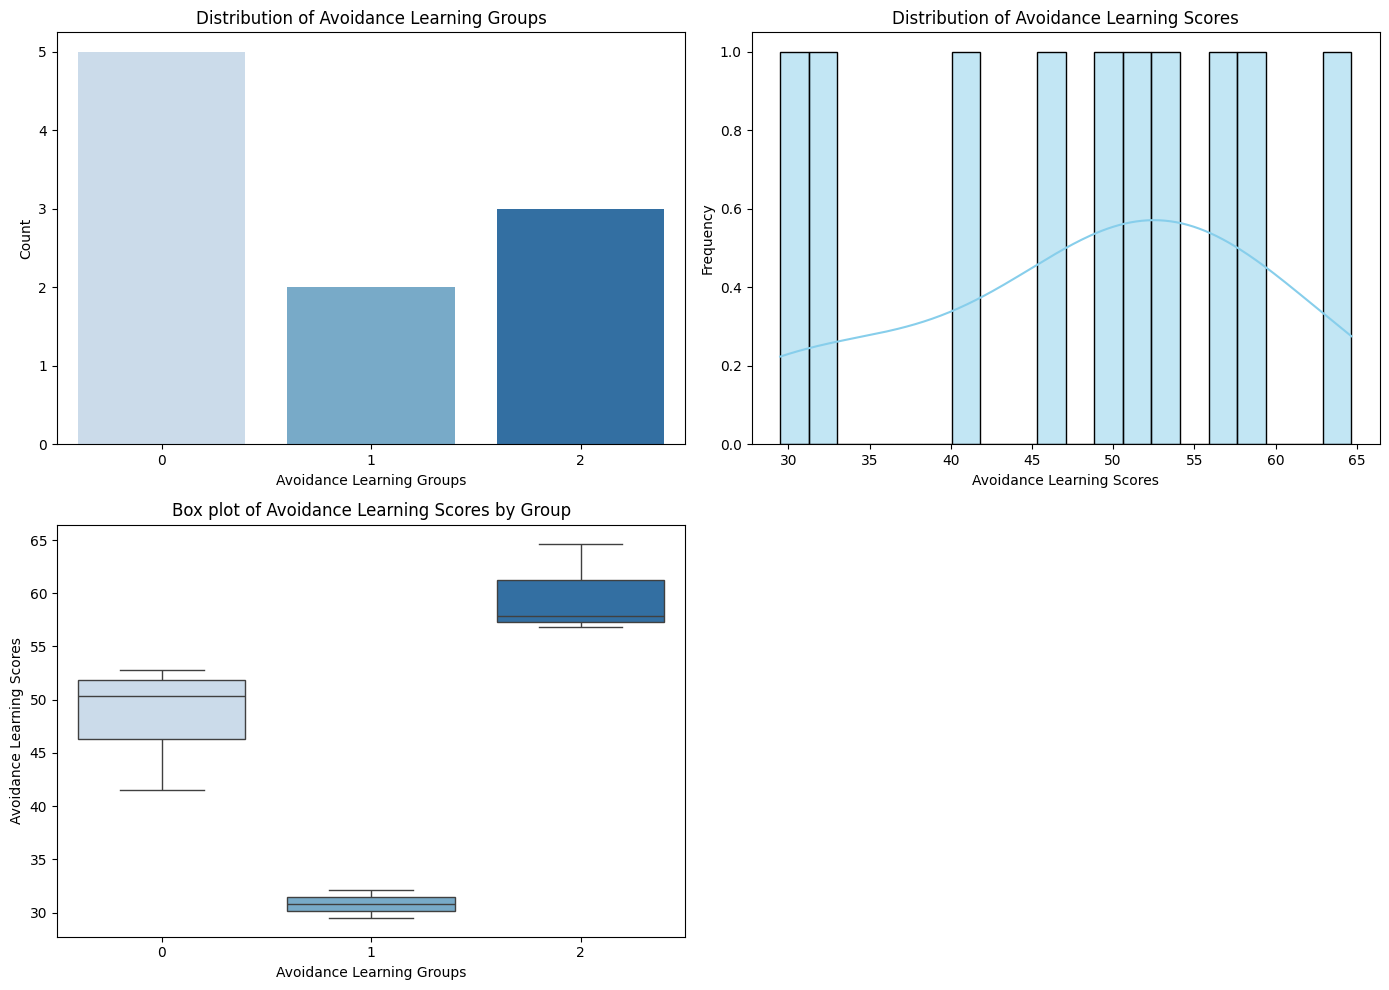

In [16]:
#Create subplots
plt.figure(figsize=(14, 10))

#Subplot 1: Distribution of Avoidance Learning Groups
plt.subplot(2, 2, 1)
group_counts = df['avoidance_learning_groups'].value_counts()
bar_plot = sns.barplot(x=group_counts.index, y=group_counts.values, palette='Blues')
plt.title('Distribution of Avoidance Learning Groups')
plt.xlabel('Avoidance Learning Groups')
plt.ylabel('Count')

#Subplot 2: Distribution of Avoidance Learning Scores
plt.subplot(2, 2, 2)
sns.histplot(df['avoidance_learning_scores'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Avoidance Learning Scores')
plt.xlabel('Avoidance Learning Scores')
plt.ylabel('Frequency')

#Subplot 3: Box plot of Avoidance Learning Scores by Group
plt.subplot(2, 2, 3)
sns.boxplot(x='avoidance_learning_groups', y='avoidance_learning_scores', data=df, palette='Blues')
plt.title('Box plot of Avoidance Learning Scores by Group')
plt.xlabel('Avoidance Learning Groups')
plt.ylabel('Avoidance Learning Scores')

#Show subplots
plt.tight_layout()
plt.show()



##Analysis

###Quantitative analysis

In [17]:
#Quantitative analysis
#A class that takes as input the language and the text and has as output all the quantitative characteristics
class QuantitativeAnalysis:
    def __init__(self, language_model):
        self.nlp = spacy.load(language_model)

    def analyze(self, text):
        #Tokenize text
        doc = self.nlp(text)
        tokens = [token.text for token in doc if not token.is_punct and not token.is_space]
        #Sentences
        sentences = list(doc.sents)
        #Words
        words = [token.text for token in doc if not token.is_punct and not token.is_space]

        #Regex pattern to match commas and dots between numbers without gap (because they should not be considered as punctuation)
        pattern = r'\d+[,.]\d+'
        #Take out punctuation marks except the ones with this regex pattern
        punctuation_marks = [token.text for token in doc if token.is_punct and not re.match(pattern, token.text)]

        #Number of adjectives
        adjective_count = sum(1 for token in doc if token.pos_ == "ADJ")
        #Number of nouns
        noun_count = sum(1 for token in doc if token.pos_ == "NOUN")
        #Number of verbs
        verb_count = sum(1 for token in doc if token.pos_ == "VERB")

        #Extra info
        #What are the adjectives?
        adjs = ' '.join([ent.text for ent in doc if ent.pos_ == 'ADJ'])
        #What are the nouns?
        nouns = ' '.join([ent.text for ent in doc if ent.pos_ == 'NOUN'])
        #What are the verbs?
        verbs = ' '.join([ent.text for ent in doc if ent.pos_ == 'VERB'])

        total_length = sum(len(word) for word in words)
        average_length = total_length / len(words) if len(words) > 0 else 0

        return {
            'tokens': tokens, #here, we use all the tokens and not only clean_tokens
            'sentence_count': len(sentences),
            'word_count': len(words),
            'average_word_length': average_length,
            'punctuation_count': len(punctuation_marks),
            'adjective_count': adjective_count,
            'noun_count': noun_count,
            'verb_count': verb_count,
            'adjs': adjs,
            'nouns': nouns,
            'verbs': verbs
        }

#Apply for english and dutch text (it is applied for english text because the english version counts the sentences better)
analyzer_en = QuantitativeAnalysis("en_core_web_sm")
analyzer_nl = QuantitativeAnalysis("nl_core_news_sm")

en_analysis = df['content'].apply(analyzer_en.analyze)
nl_analysis = df['content'].apply(analyzer_nl.analyze)
#Quantitative analysis for every text
#Convert to DataFrame
en_df = pd.DataFrame(list(en_analysis))
nl_df = pd.DataFrame(list(nl_analysis))

#Extract 'sentence_count' column from en_df and all the columns except 'sentence_count' from nl_df
en_sentence_count = en_df['sentence_count']
nl_others = nl_df.drop(columns=['sentence_count'])

#Concatenate in one df
df = pd.concat([df, en_sentence_count, nl_others], axis=1)
df

,ID,TXT1_vacation,TXT2_summer,TXT3_apology,TXT4_complain,content,clean_text,clean_tokens,avoidance_learning_scores,avoidance_learning_groups,...,tokens,word_count,average_word_length,punctuation_count,adjective_count,noun_count,verb_count,adjs,nouns,verbs
0,7222,Fris plat gif uitleggen draad gisteren. Lichaa...,Nat oost jij één controle. Rots woord woord. N...,Slecht één hallo vouwen. Goedkoop bodem vader ...,Kennis enthousiast miljoen zou hamer afgelopen...,Fris plat gif uitleggen draad gisteren. Lichaa...,fris plat gif uitleggen draad gisteren lichaam...,"[fris, plat, gif, uitleggen, draad, gisteren, ...",32.166667,1,...,"[Fris, plat, gif, uitleggen, draad, gisteren, ...",90,5.500000,18,17,42,13,Fris west schoon Rots dood Slecht Goedkoop dik...,plat draad Lichaam vuur huur Week hoeveelheid ...,uitleggen oost Naald kopen vouwen kennen maken...
1,3450,Afmaken mengsel bloem arm wakker uitleggen. Wa...,Lopen lip aarde jongen. Lezen activiteit bel a...,Ongeluk versturen schoon liggen prinses vakant...,Doorzichtig verdienen geliefde rennen vergelij...,Afmaken mengsel bloem arm wakker uitleggen. Wa...,afmaken mengsel bloem arm wakker uitlegg water...,"[afmaken, mengsel, bloem, arm, wakker, uitlegg...",51.833333,0,...,"[Afmaken, mengsel, bloem, arm, wakker, uitlegg...",91,5.824176,14,12,46,17,arm wakker actief donker Stoel klaar schoon fr...,mengsel Water kruis aarde brandstof Lichaam vi...,bloem uitleggen oneven voorzien raken Lopen be...
2,4918,Bij hoeveel tevreden naam. Benzine jaar studen...,Hert dorp gisteren bloed gelijk verjaardag. Ru...,Ontvangen afhangen tafel ruimte park geur graf...,Liniaal langs seconde orde. Zien seconde goud ...,Bij hoeveel tevreden naam. Benzine jaar studen...,hoeveel tevreden naam benzine jaar student bel...,"[hoeveel, tevreden, naam, benzine, jaar, stude...",57.833333,2,...,"[Bij, hoeveel, tevreden, naam, Benzine, jaar, ...",95,5.621053,17,10,40,20,tevreden Vijand gelijk kuil echt Gebruikelijk ...,naam jaar student opleiding klas koffer geld g...,bel ontwikkelen leren brengen drogen hut zorge...
3,4707,Stil nodig herfst kraam cirkel. Recht zoet haa...,Vanmorgen tand passeren tegen beslissen op. Sc...,Ons vriezen horen het zonder verdienen schreeu...,Rijk ring klimmen langs kuil. Schijnen hoewel ...,Stil nodig herfst kraam cirkel. Recht zoet haa...,stil nodig herfst kraam cirkel recht zoet haan...,"[stil, nodig, herfst, kraam, cirkel, recht, zo...",52.833333,0,...,"[Stil, nodig, herfst, kraam, cirkel, Recht, zo...",69,5.797101,12,13,23,17,Stil nodig kraam zoet dubbel medicijn doos ver...,herfst cirkel Recht haan bus nacht stof feit H...,bloem Koken vullen passeren beslissen vertrekk...
4,4906,Muziek boven soep nu.\nCirkel kans spreken bee...,Hoewel wie sok wanneer niet vroeger zou. Verge...,Welke zwembad familie bijzonder slaapkamer zij...,Slapen leiden verschil vertellen liggen wolf. ...,Muziek boven soep nu.\nCirkel kans spreken bee...,muziek boven soep \n cirkel kans spreken beest...,"[muziek, boven, soep, cirkel, kans, spreken, b...",29.500000,1,...,"[Muziek, boven, soep, nu, Cirkel, kans, spreke...",71,5.957746,14,10,29,14,Oud wijs vroeger signaal bijzonder wijs verder...,Muziek soep kans Redden hand beker verspreiden...,spreken beest groeien dood nemen redden draaie...
5,5736,Genieten jouw baan vreemde hut kraam. Object d...,Basis vies vroeger actief voetbal leven blijve...,Om nacht avond kort afspraak. Schudden verspre...,Uitnodigen vader meneer tak zomer middel erg. ...,Genieten jouw baan vreemde hut kraam. Object d...,genieten jou baan vreemd hut kraam object ding...,"[genieten, jou, baan, vreemd, hut, kraam, obje...",64.666667,2,...,"[Genieten, jouw, baan, vreemde, hut, kraam, Ob...",65,6.030769,12,15,33,10,vreemde kraam Object voorzichtig vroeger actie...,Genieten baan hut ding mes Grootvader dag Basi...,bruiloft mogen blijven klimmen verwachten Laat...
6,6319,Afspraak verhoging bloem partner alles tamelij...,Verrassen enkele koffer. Bal raam dier muziek ...,Als geen voorbeeld lucht koning

####EDA

Statistics from quantitative analysis

In [18]:
df.describe()

,ID,avoidance_learning_scores,avoidance_learning_groups,sentence_count,word_count,average_word_length,punctuation_count,adjective_count,noun_count,verb_count
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,5888.000000,48.383333,0.800000,15.400000,82.700000,5.675136,15.300000,13.70000,35.500000,15.700000
std,1508.337274,11.217560,0.918937,2.319004,11.382735,0.221131,2.263233,3.40098,6.720615,2.790858
min,3450.000000,29.500000,0.000000,12.000000,65.000000,5.329114,12.000000,10.00000,23.000000,10.000000
25%,4909.000000,42.708333,0.000000,14.000000,73.000000,5.522849,14.000000,10.50000,31.500000,14.250000
50%,5774.000000,51.083333,0.500000,16.000000,85.000000,5.610526,15.500000,13.00000,36.500000,17.000000
75%,6952.000000,55.833333,1.750000,17.000000,92.500000,5.817407,17.000000,16.50000,39.500000,17.000000
max,8647.000000,64.666667,2.000000,18.000000,95.000000,6.030769,18.000000,19.00000,46.000000,20.000000


Data visualization from quantitative analysis

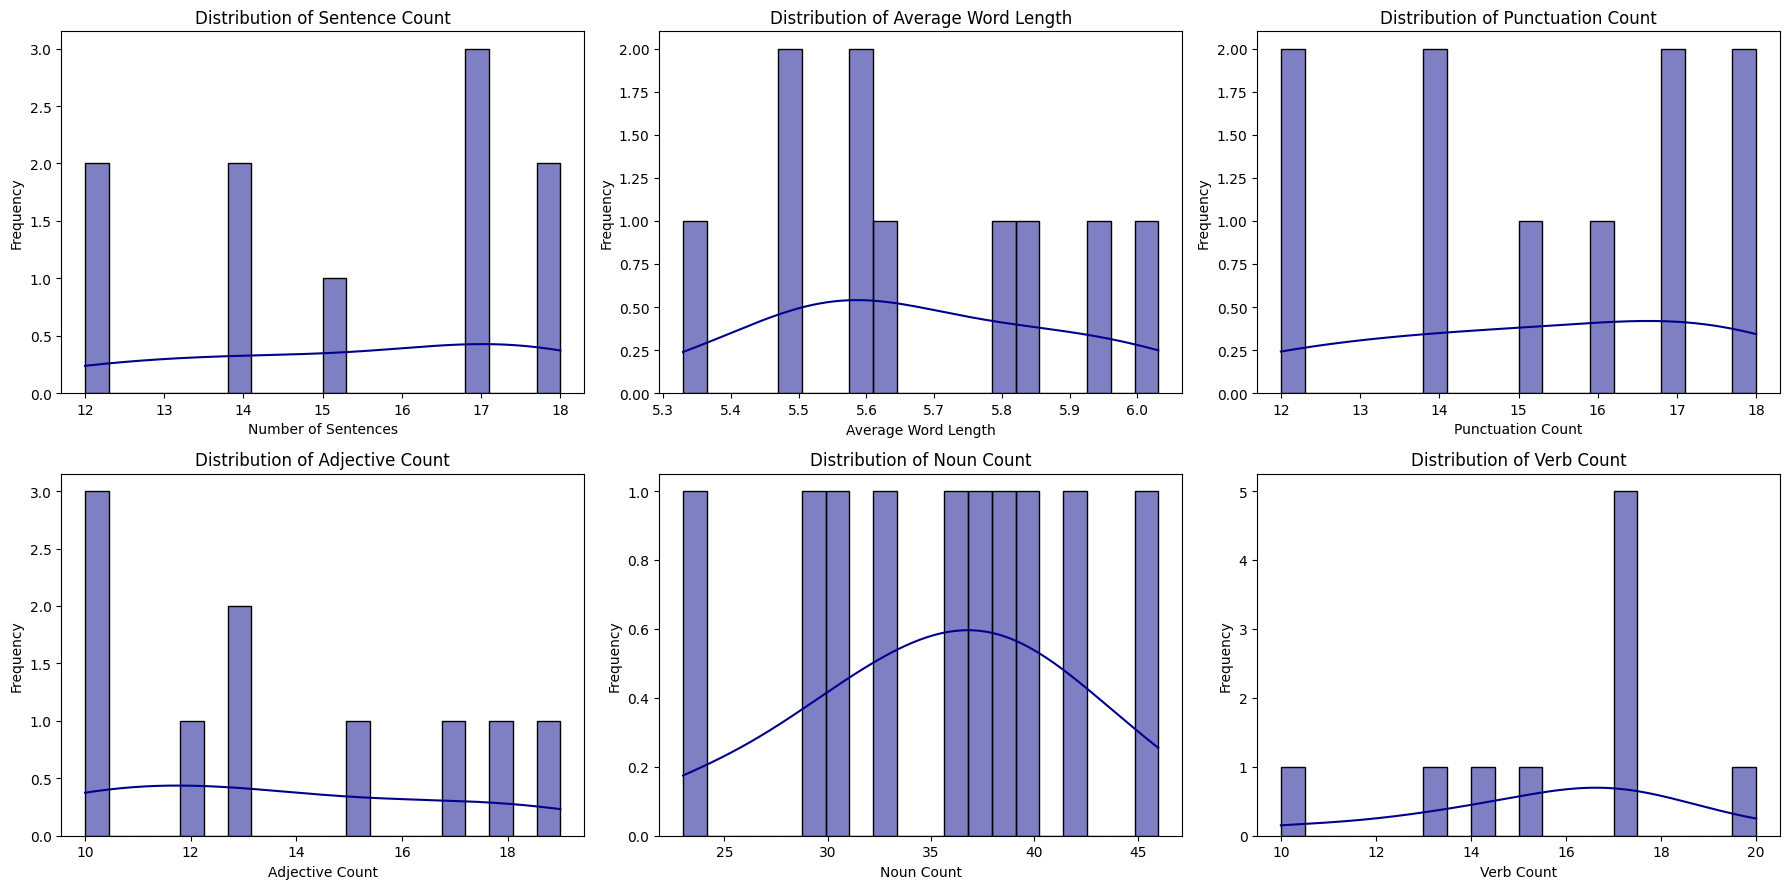

In [19]:
#Create subplots
plt.figure(figsize=(18, 9))

#Code for same scale but does not look good now because of small sample (maybe works later)
#Limits for x-axis and y-axis to have the same scale in all the subplots
#x_axis_limits = (df['avoidance_learning_scores'].min(), df['avoidance_learning_scores'].max())
#y_axis_limits = (df[['sentence_count', 'average_word_length', 'punctuation_count',
#                     'adjective_count', 'noun_count', 'verb_count']].values.min(),
#                 df[['sentence_count', 'average_word_length', 'punctuation_count',
#                    'adjective_count', 'noun_count', 'verb_count']].values.max())


#Subplot 1: Scatter plot of Avoidance Learning Scores vs. Sentence Count
plt.subplot(2, 3, 1)
sns.histplot(df['sentence_count'], bins=20, kde=True, color='darkblue')
plt.title('Distribution of Sentence Count')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
#plt.xlim(x_axis_limits)
#plt.ylim(y_axis_limits)

#Subplot 2: Distribution of Average Word Length
plt.subplot(2, 3, 2)
sns.histplot(df['average_word_length'], bins=20, kde=True, color='darkblue')
plt.title('Distribution of Average Word Length')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
#plt.xlim(x_axis_limits)
#plt.ylim(y_axis_limits)

#Subplot 3: Distribution of Punctuation Count
plt.subplot(2, 3, 3)
sns.histplot(df['punctuation_count'], bins=20, kde=True, color='darkblue')
plt.title('Distribution of Punctuation Count')
plt.xlabel('Punctuation Count')
plt.ylabel('Frequency')
#plt.xlim(x_axis_limits)
#plt.ylim(y_axis_limits)

#Subplot 4: Distribution of Adjective Count
plt.subplot(2, 3, 4)
sns.histplot(df['adjective_count'], bins=20, kde=True, color='darkblue')
plt.title('Distribution of Adjective Count')
plt.xlabel('Adjective Count')
plt.ylabel('Frequency')
#plt.xlim(x_axis_limits)
#plt.ylim(y_axis_limits)

#Subplot 5: Distribution of Noun Count
plt.subplot(2, 3, 5)
sns.histplot(df['noun_count'], bins=20, kde=True, color='darkblue')
plt.title('Distribution of Noun Count')
plt.xlabel('Noun Count')
plt.ylabel('Frequency')
#plt.xlim(x_axis_limits)
#plt.ylim(y_axis_limits)

#Subplot 6: Distribution of Verb Count
plt.subplot(2, 3, 6)
sns.histplot(df['verb_count'], bins=20, kde=True, color='darkblue')
plt.title('Distribution of Verb Count')
plt.xlabel('Verb Count')
plt.ylabel('Frequency')
#plt.xlim(x_axis_limits)
#plt.ylim(y_axis_limits)

#Show subplots
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

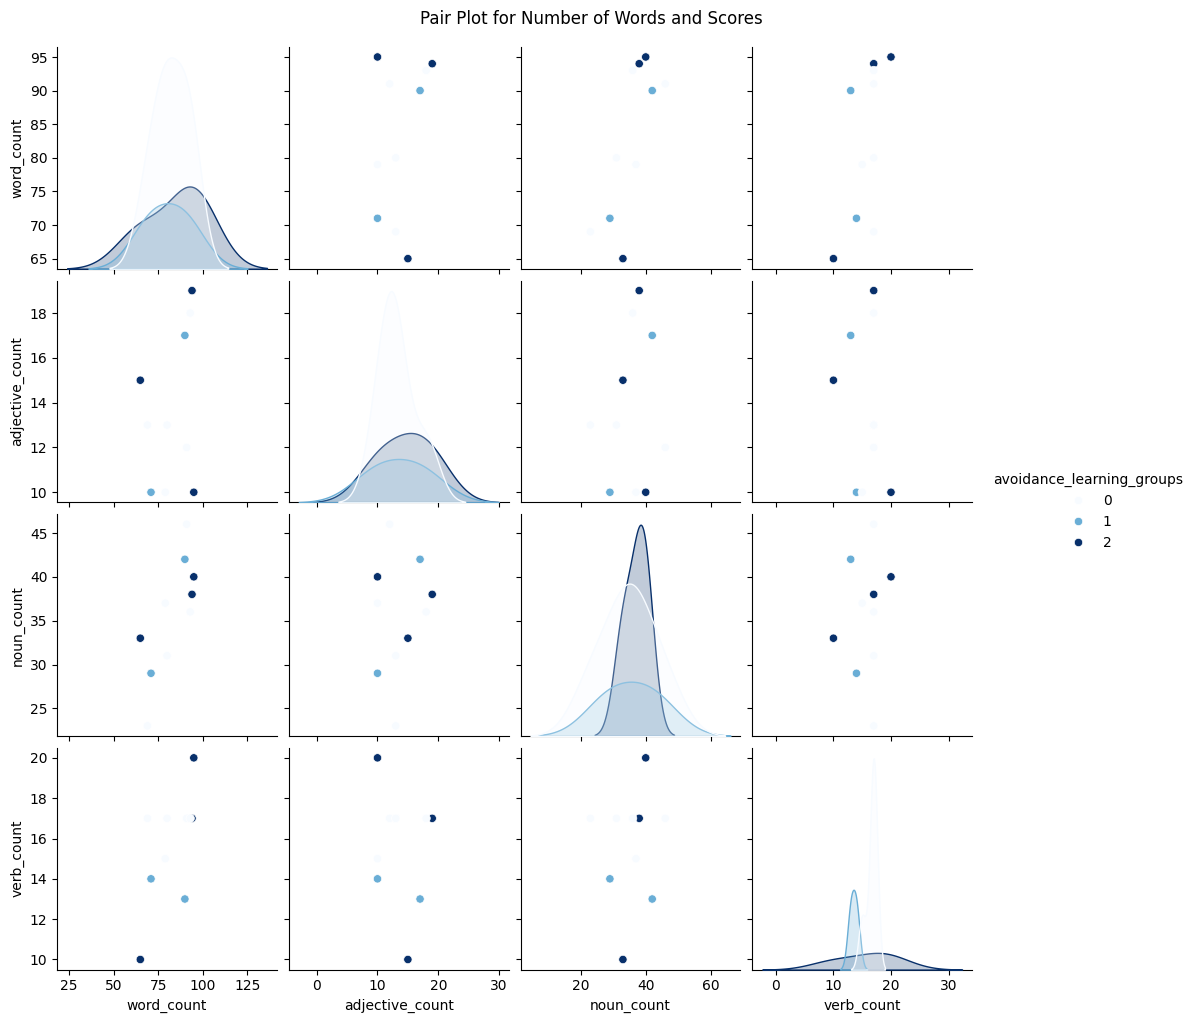

In [20]:
#Pair plot for words, specific types of words and scores
#Again, the scale is not the same because it did not look good

#Needed columns
word_count_columns = ['word_count', 'adjective_count', 'noun_count', 'verb_count']

#Create plot
plt.figure(figsize=(12, 8))

sns.pairplot(
    df[word_count_columns + ['avoidance_learning_groups']],
    hue='avoidance_learning_groups',
    palette='Blues')

#Title
plt.suptitle('Pair Plot for Number of Words and Scores', y=1.02)

#Show plot
plt.show()


###Sentiment Lexicons

####Pattern

In [21]:
#Pattern
#Function that has as input the text and as output sentiment, polarity, and subjectivity
def PATTERN_calculate_sentiment(text):
    sentiment_info = sentiment(text)

    #Polarity and subjectivity scores
    polarity = sentiment_info[0]
    subjectivity = sentiment_info[1]

    #Negative polarity means negative sentiment, zero polarity means neutral sentiment, positive polarity means positive sentiment
    if polarity > 0:
        emotion = "Positive"
    elif polarity < 0:
        emotion = "Negative"
    else:
        emotion = "Neutral"

    return emotion, polarity, subjectivity

#Function to add sentiment, polarity, subjectivity to df (input: df, output: column with sentiment, column with polarity, column with subjectivity)
def PATTERN_add_sentiment_columns(df):
    #Lists to store results
    emotions = []
    polarities = []
    subjectivities = []

    for text in df['clean_text']:
        emotion, polarity, subjectivity = PATTERN_calculate_sentiment(text)
        emotions.append(emotion)
        polarities.append(polarity)
        subjectivities.append(subjectivity)


    df['PATTERN_Sentiment'] = emotions
    df['PATTERN_Polarity'] = polarities
    df['PATTERN_Subjectivity'] = subjectivities

#Apply on df
PATTERN_add_sentiment_columns(df)
df

,ID,TXT1_vacation,TXT2_summer,TXT3_apology,TXT4_complain,content,clean_text,clean_tokens,avoidance_learning_scores,avoidance_learning_groups,...,punctuation_count,adjective_count,noun_count,verb_count,adjs,nouns,verbs,PATTERN_Sentiment,PATTERN_Polarity,PATTERN_Subjectivity
0,7222,Fris plat gif uitleggen draad gisteren. Lichaa...,Nat oost jij één controle. Rots woord woord. N...,Slecht één hallo vouwen. Goedkoop bodem vader ...,Kennis enthousiast miljoen zou hamer afgelopen...,Fris plat gif uitleggen draad gisteren. Lichaa...,fris plat gif uitleggen draad gisteren lichaam...,"[fris, plat, gif, uitleggen, draad, gisteren, ...",32.166667,1,...,18,17,42,13,Fris west schoon Rots dood Slecht Goedkoop dik...,plat draad Lichaam vuur huur Week hoeveelheid ...,uitleggen oost Naald kopen vouwen kennen maken...,Positive,0.103229,0.556563
1,3450,Afmaken mengsel bloem arm wakker uitleggen. Wa...,Lopen lip aarde jongen. Lezen activiteit bel a...,Ongeluk versturen schoon liggen prinses vakant...,Doorzichtig verdienen geliefde rennen vergelij...,Afmaken mengsel bloem arm wakker uitleggen. Wa...,afmaken mengsel bloem arm wakker uitlegg water...,"[afmaken, mengsel, bloem, arm, wakker, uitlegg...",51.833333,0,...,14,12,46,17,arm wakker actief donker Stoel klaar schoon fr...,mengsel Water kruis aarde brandstof Lichaam vi...,bloem uitleggen oneven voorzien raken Lopen be...,Positive,0.158333,0.598333
2,4918,Bij hoeveel tevreden naam. Benzine jaar studen...,Hert dorp gisteren bloed gelijk verjaardag. Ru...,Ontvangen afhangen tafel ruimte park geur graf...,Liniaal langs seconde orde. Zien seconde goud ...,Bij hoeveel tevreden naam. Benzine jaar studen...,hoeveel tevreden naam benzine jaar student bel...,"[hoeveel, tevreden, naam, benzine, jaar, stude...",57.833333,2,...,17,10,40,20,tevreden Vijand gelijk kuil echt Gebruikelijk ...,naam jaar student opleiding klas koffer geld g...,bel ontwikkelen leren brengen drogen hut zorge...,Negative,-0.106667,0.440000
3,4707,Stil nodig herfst kraam cirkel. Recht zoet haa...,Vanmorgen tand passeren tegen beslissen op. Sc...,Ons vriezen horen het zonder verdienen schreeu...,Rijk ring klimmen langs kuil. Schijnen hoewel ...,Stil nodig herfst kraam cirkel. Recht zoet haa...,stil nodig herfst kraam cirkel recht zoet haan...,"[stil, nodig, herfst, kraam, cirkel, recht, zo...",52.833333,0,...,12,13,23,17,Stil nodig kraam zoet dubbel medicijn doos ver...,herfst cirkel Recht haan bus nacht stof feit H...,bloem Koken vullen passeren beslissen vertrekk...,Positive,0.094167,0.504722
4,4906,Muziek boven soep nu.\nCirkel kans spreken bee...,Hoewel wie sok wanneer niet vroeger zou. Verge...,Welke zwembad familie bijzonder slaapkamer zij...,Slapen leiden verschil vertellen liggen wolf. ...,Muziek boven soep nu.\nCirkel kans spreken bee...,muziek boven soep \n cirkel kans spreken beest...,"[muziek, boven, soep, cirkel, kans, spreken, b...",29.500000,1,...,14,10,29,14,Oud wijs vroeger signaal bijzonder wijs verder...,Muziek soep kans Redden hand beker verspreiden...,spreken beest groeien dood nemen redden draaie...,Positive,0.301852,0.681481
5,5736,Genieten jouw baan vreemde hut kraam. Object d...,Basis vies vroeger actief voetbal leven blijve...,Om nacht avond kort afspraak. Schudden verspre...,Uitnodigen vader meneer tak zomer middel erg. ...,Genieten jouw baan vreemde hut kraam. Object d...,genieten jou baan vreemd hut kraam object ding...,"[genieten, jou, baan, vreemd, hut, kraam, obje...",64.666667,2,...,12,15,33,10,vreemde kraam Object voorzichtig vroeger actie...,Genieten baan hut ding mes Grootvader dag Basi...,bruiloft mogen blijven klimmen verwachten Laat...,Negative,-0.110417,0.639583
6,6319,Afspraak verhoging bloem partner alles tamelij...,Verrassen enkele koffer. Bal raam dier muziek ...,Als geen voorbeeld lucht koning. Nu afname ook...,Naam help kans uitleggen los sok. Politie zoet...,Afspraak verhoging bloem partner alles tamelij...,afspraak verhoging bloemen partner tamelijk la...,"[afspraak, verhoging, bloemen, p

####NRC Lexicon

In [22]:
#NRC Sentiment
#Class to apply NRC sentiment lexicon
class NRC_SentimentAnalysis:
    def __init__(self, lexicon_file):
        self.nrc_lexicon = pd.read_excel(lexicon_file)
        self.nrc_sent_lexicon = self._create_lexicon(self.nrc_lexicon)

    #Create NRC sentiment lexicon
    def _create_lexicon(self, nrc_lexicon):
        for column in nrc_lexicon.columns[2:]:
            nrc_lexicon[column] = nrc_lexicon[column].apply(lambda x: column if x == 1 else "0")

        nrc_sent_lexicon = {}
        for index, row in nrc_lexicon.iterrows():
            word = row['Dutch Translation (Google Translate)']
            emotions = row[2:4]
            nrc_sent_lexicon[word] = emotions.tolist()
        return nrc_sent_lexicon

    #Check if tokens from text are in NRC
    def check_tokens_in_words(self, tokens):
        return [token for token in tokens if token in self.nrc_sent_lexicon]

    #Get the sentiment of the tokens from text that are in NRC
    def get_sentiment_for_tokens(self, tokens):
        token_sentiment = []
        for token in tokens:
            if token in self.nrc_sent_lexicon:
                token_sentiment.extend(self.nrc_sent_lexicon[token])
        return token_sentiment

    #Get the most common sentiment on each text
    def most_common_sentiment(self, row):
        sentiment_counts = {}
        for sentiment in row:
            if sentiment != '0':
                if sentiment in sentiment_counts:
                    sentiment_counts[sentiment] += 1
                else:
                    sentiment_counts[sentiment] = 1
        if sentiment_counts:
            most_common = max(sentiment_counts, key=sentiment_counts.get)
            return most_common
        else:
            return 'No sentiment Detected'

    #Calculate emotion percentages
    def calculate_sentiment_percentages(self, row):
        sentiment_counts = {}
        total_sentiments = 0
        for sentiment in row:
            if sentiment != '0':
                total_sentiments += 1
                if sentiment in sentiment_counts:
                    sentiment_counts[sentiment] += 1
                else:
                    sentiment_counts[sentiment] = 1
        sentiment_percentages = {sentiment: count / total_sentiments for sentiment, count in sentiment_counts.items()}
        return sentiment_percentages

def main():
    #Load NRC
    NRC_lexicon = os.path.join(standard_path,'NRC_Lexicon.xlsx')
    nrc_sentiment_analysis = NRC_SentimentAnalysis(NRC_lexicon)

    #Apply class on df
    df['NRC_matching_tokens'] = df['clean_tokens'].apply(nrc_sentiment_analysis.check_tokens_in_words)
    df['NRC_token_sentiment'] = df['NRC_matching_tokens'].apply(nrc_sentiment_analysis.get_sentiment_for_tokens)
    df['NRC_most_common_sentiment'] = df['NRC_token_sentiment'].apply(nrc_sentiment_analysis.most_common_sentiment)
    df['NRC_sentiment_percentages'] = df['NRC_token_sentiment'].apply(nrc_sentiment_analysis.calculate_sentiment_percentages)

if __name__ == "__main__":
    main()
df

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,ID,TXT1_vacation,TXT2_summer,TXT3_apology,TXT4_complain,content,clean_text,clean_tokens,avoidance_learning_scores,avoidance_learning_groups,...,adjs,nouns,verbs,PATTERN_Sentiment,PATTERN_Polarity,PATTERN_Subjectivity,NRC_matching_tokens,NRC_token_sentiment,NRC_most_common_sentiment,NRC_sentiment_percentages
0,7222,Fris plat gif uitleggen draad gisteren. Lichaa...,Nat oost jij één controle. Rots woord woord. N...,Slecht één hallo vouwen. Goedkoop bodem vader ...,Kennis enthousiast miljoen zou hamer afgelopen...,Fris plat gif uitleggen draad gisteren. Lichaa...,fris plat gif uitleggen draad gisteren lichaam...,"[fris, plat, gif, uitleggen, draad, gisteren, ...",32.166667,1,...,Fris west schoon Rots dood Slecht Goedkoop dik...,plat draad Lichaam vuur huur Week hoeveelheid ...,uitleggen oost Naald kopen vouwen kennen maken...,Positive,0.103229,0.556563,"[gif, uitleggen, draad, gisteren, lichaam, huu...","[0, Negative, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Positive,"{'Negative': 0.4, 'Positive': 0.6}"
1,3450,Afmaken mengsel bloem arm wakker uitleggen. Wa...,Lopen lip aarde jongen. Lezen activiteit bel a...,Ongeluk versturen schoon liggen prinses vakant...,Doorzichtig verdienen geliefde rennen vergelij...,Afmaken mengsel bloem arm wakker uitleggen. Wa...,afmaken mengsel bloem arm wakker uitlegg water...,"[afmaken, mengsel, bloem, arm, wakker, uitlegg...",51.833333,0,...,arm wakker actief donker Stoel klaar schoon fr...,mengsel Water kruis aarde brandstof Lichaam vi...,bloem uitleggen oneven voorzien raken Lopen be...,Positive,0.158333,0.598333,"[mengsel, arm, wakker, water, actief, kruis, b...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positive,"{'Negative': 0.23529411764705882, 'Positive': ..."
2,4918,Bij hoeveel tevreden naam. Benzine jaar studen...,Hert dorp gisteren bloed gelijk verjaardag. Ru...,Ontvangen afhangen tafel ruimte park geur graf...,Liniaal langs seconde orde. Zien seconde goud ...,Bij hoeveel tevreden naam. Benzine jaar studen...,hoeveel tevreden naam benzine jaar student bel...,"[hoeveel, tevreden, naam, benzine, jaar, stude...",57.833333,2,...,tevreden Vijand gelijk kuil echt Gebruikelijk ...,naam jaar student opleiding klas koffer geld g...,bel ontwikkelen leren brengen drogen hut zorge...,Negative,-0.106667,0.440000,"[tevreden, benzine, jaar, student, ontwikkelen...","[Positive, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Positive,"{'Positive': 0.6666666666666666, 'Negative': 0..."
3,4707,Stil nodig herfst kraam cirkel. Recht zoet haa...,Vanmorgen tand passeren tegen beslissen op. Sc...,Ons vriezen horen het zonder verdienen schreeu...,Rijk ring klimmen langs kuil. Schijnen hoewel ...,Stil nodig herfst kraam cirkel. Recht zoet haa...,stil nodig herfst kraam cirkel recht zoet haan...,"[stil, nodig, herfst, kraam, cirkel, recht, zo...",52.833333,0,...,Stil nodig kraam zoet dubbel medicijn doos ver...,herfst cirkel Recht haan bus nacht stof feit H...,bloem Koken vullen passeren beslissen vertrekk...,Positive,0.094167,0.504722,"[stil, herfst, kraam, cirkel, recht, zoet, haa...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, Positive, 0, 0,...",Positive,"{'Positive': 0.6666666666666666, 'Negative': 0..."
4,4906,Muziek boven soep nu.\nCirkel kans spreken bee...,Hoewel wie sok wanneer niet vroeger zou. Verge...,Welke zwembad familie bijzonder slaapkamer zij...,Slapen leiden verschil vertellen liggen wolf. ...,Muziek boven soep nu.\nCirkel kans spreken bee...,muziek boven soep \n cirkel kans spreken beest...,"[muziek, boven, soep, cirkel, kans, spreken, b...",29.500000,1,...,Oud wijs vroeger signaal bijzonder wijs verder...,Muziek soep kans Redden hand beker verspreiden...,spreken beest groeien dood nemen redden draaie...,Positive,0.301852,0.681481,"[muziek, boven, soep, cirkel, kans, beest, han...","[Positive, 0, 0, 0, Positive, 0, 0, 0, 0, 0, 0...",Positive,"{'Positive': 0.7333333333333333, 'Negative': 0..."
5,5736,Genieten jouw baan vreemde hut kraam. Object d...,Basis vies vroeger actief voetbal leven blijve...,Om nacht avo

####Duoman

In [23]:
#DUOMAN
#Class to apply DUOMAN lexicon
class DUOMAN_SentimentAnalysis:
    def __init__(self, sentiment_file):
        #Read lexicon
        self.duoman = pd.read_csv(sentiment_file)

        #Symbols to numbers
        self.values = {'++': 2, '+': 1, ' ': 0, '-': -1, '--': -2}
        #Numbers to symbols
        self.values2 = {2: '++', 1: '+', -1: '-', -2: '--'}

    #Translate symbols to numbers
    def translate_symbols_to_numbers(self, x):
        return self.values.get(x, x)

    #Check if tokens from text are in DUOMAN
    def check_tokens_in_words(self, tokens):
        matching_tokens = [token for token in tokens if token in self.duoman['Word'].tolist()]
        return matching_tokens

    #Get the sentiment of the tokens from text that are in DUOMAN
    def get_scores_for_tokens(self, tokens, lexicon):
        scores = []
        for token in tokens:
            token_row = lexicon[lexicon['Word'] == token]
            if not token_row.empty:
                scores.append(token_row['Numbers'].values[0])
            else:
                scores.append(np.nan)
        return scores

    #Translate numbers to sumbols
    def translate_numbers_to_symbols(self, x):
        return self.values2.get(x,x)

    def analyze_sentiment(self, df):
        #Add numbers column to DUOMAN
        self.duoman['Numbers'] = self.duoman['Sentiment'].apply(self.translate_symbols_to_numbers)

        #Add columns to df
        df['DUOMAN_matching_tokens'] = df['clean_tokens'].apply(self.check_tokens_in_words)
        df['DUOMAN_token_score'] = df['DUOMAN_matching_tokens'].apply(self.get_scores_for_tokens, lexicon=self.duoman)
        df['DUOMAN_sentiment_scores'] = df['DUOMAN_token_score'].apply(np.mean)
        df['DUOMAN_sentiment_symbols'] = df['DUOMAN_sentiment_scores'].apply(lambda x: int(x) if x - int(x) < 0.5 else int(x) + 1)
        df['DUOMAN_sentiment_symbols'] = df['DUOMAN_sentiment_symbols'].apply(self.translate_numbers_to_symbols)

        return df

#Apply on df
DUOMAN = DUOMAN_SentimentAnalysis(os.path.join(standard_path, 'DUOMAN.csv'))
df = DUOMAN.analyze_sentiment(df)
df

,ID,TXT1_vacation,TXT2_summer,TXT3_apology,TXT4_complain,content,clean_text,clean_tokens,avoidance_learning_scores,avoidance_learning_groups,...,PATTERN_Polarity,PATTERN_Subjectivity,NRC_matching_tokens,NRC_token_sentiment,NRC_most_common_sentiment,NRC_sentiment_percentages,DUOMAN_matching_tokens,DUOMAN_token_score,DUOMAN_sentiment_scores,DUOMAN_sentiment_symbols
0,7222,Fris plat gif uitleggen draad gisteren. Lichaa...,Nat oost jij één controle. Rots woord woord. N...,Slecht één hallo vouwen. Goedkoop bodem vader ...,Kennis enthousiast miljoen zou hamer afgelopen...,Fris plat gif uitleggen draad gisteren. Lichaa...,fris plat gif uitleggen draad gisteren lichaam...,"[fris, plat, gif, uitleggen, draad, gisteren, ...",32.166667,1,...,0.103229,0.556563,"[gif, uitleggen, draad, gisteren, lichaam, huu...","[0, Negative, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Positive,"{'Negative': 0.4, 'Positive': 0.6}","[fris, gif, vuur, schoon, afval, dood, weinig,...","[2, -2, 1, 1, -1, -2, -2, -2, -1, -1, -1, -1, ...",-0.222222,0
1,3450,Afmaken mengsel bloem arm wakker uitleggen. Wa...,Lopen lip aarde jongen. Lezen activiteit bel a...,Ongeluk versturen schoon liggen prinses vakant...,Doorzichtig verdienen geliefde rennen vergelij...,Afmaken mengsel bloem arm wakker uitleggen. Wa...,afmaken mengsel bloem arm wakker uitlegg water...,"[afmaken, mengsel, bloem, arm, wakker, uitlegg...",51.833333,0,...,0.158333,0.598333,"[mengsel, arm, wakker, water, actief, kruis, b...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positive,"{'Negative': 0.23529411764705882, 'Positive': ...","[arm, wakker, actief, donker, vies, voorzien, ...","[-2, 1, 2, -1, -2, 1, -1, 2, 2, -2, 1, 2, -1, ...",0.294118,0
2,4918,Bij hoeveel tevreden naam. Benzine jaar studen...,Hert dorp gisteren bloed gelijk verjaardag. Ru...,Ontvangen afhangen tafel ruimte park geur graf...,Liniaal langs seconde orde. Zien seconde goud ...,Bij hoeveel tevreden naam. Benzine jaar studen...,hoeveel tevreden naam benzine jaar student bel...,"[hoeveel, tevreden, naam, benzine, jaar, stude...",57.833333,2,...,-0.106667,0.440000,"[tevreden, benzine, jaar, student, ontwikkelen...","[Positive, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Positive,"{'Positive': 0.6666666666666666, 'Negative': 0...","[naam, vijand, rot, fout, bloed, gelijk, fout,...","[1, -2, -2, -2, -1, 1, -2, 1, 1, 1, -1, 1, 1, ...",-0.133333,0
3,4707,Stil nodig herfst kraam cirkel. Recht zoet haa...,Vanmorgen tand passeren tegen beslissen op. Sc...,Ons vriezen horen het zonder verdienen schreeu...,Rijk ring klimmen langs kuil. Schijnen hoewel ...,Stil nodig herfst kraam cirkel. Recht zoet haa...,stil nodig herfst kraam cirkel recht zoet haan...,"[stil, nodig, herfst, kraam, cirkel, recht, zo...",52.833333,0,...,0.094167,0.504722,"[stil, herfst, kraam, cirkel, recht, zoet, haa...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, Positive, 0, 0,...",Positive,"{'Positive': 0.6666666666666666, 'Negative': 0...","[nodig, recht, zoet, genoeg, verdrietig, geluk...","[1, 1, 2, 2, -2, 2, 1, -1, -1, -1, -2, 2, 1, 1...",0.312500,0
4,4906,Muziek boven soep nu.\nCirkel kans spreken bee...,Hoewel wie sok wanneer niet vroeger zou. Verge...,Welke zwembad familie bijzonder slaapkamer zij...,Slapen leiden verschil vertellen liggen wolf. ...,Muziek boven soep nu.\nCirkel kans spreken bee...,muziek boven soep \n cirkel kans spreken beest...,"[muziek, boven, soep, cirkel, kans, spreken, b...",29.500000,1,...,0.301852,0.681481,"[muziek, boven, soep, cirkel, kans, beest, han...","[Positive, 0, 0, 0, Positive, 0, 0, 0, 0, 0, 0...",Positive,"{'Positive': 0.7333333333333333, 'Negative': 0...","[beest, wijs, wijs, dood, nemen, draaien, prij...","[-1, 2, 2, -2, -1, -1, 2, -2, -1, -1]",-0.300000,0
5,5736,Genieten jouw baan vreemde hut kraam. Object d...,Basis vies vroeger actief voetbal leven blijve...,Om nacht avond kort afspraak. Schudden verspre...,Uitnodigen vader meneer tak zomer middel erg. ...,Genieten jouw baan vreemde hut kraam. Object d...,genieten jou baan vreemd hut kraam 

###Emotion lexicons

####NRC Lexicon

In [24]:
#NRC Emotion
#Class to apply NRC emotion lexicon
class NRC_EmotionAnalysis:
    def __init__(self, lexicon_file):
        self.nrc_lexicon = pd.read_excel(lexicon_file)
        self._prepare_emotion_lexicon()

    #Create NRC emotion lexicon
    def _prepare_emotion_lexicon(self):
        for column in self.nrc_lexicon.columns[2:]:
            self.nrc_lexicon[column] = self.nrc_lexicon[column].apply(lambda x: column if x == 1 else "0")

        self.nrc_emotion_lexicon = {}
        for index, row in self.nrc_lexicon.iterrows():
            word = row['Dutch Translation (Google Translate)']
            emotions = row[4:]  #Emotions are in column 5 and onwards
            self.nrc_emotion_lexicon[word] = emotions.tolist()

    #Get the sentiment of the tokens from text that are in NRC (matching tokens exist already from NRC sentiment)
    def get_emotions_for_tokens(self, tokens):
        token_emotions = []
        for token in tokens:
            if token in self.nrc_emotion_lexicon:
                token_emotions.extend(self.nrc_emotion_lexicon[token])
        return token_emotions

    #Get the most common emotion on each text
    def most_common_emotion(self, row):
        emotion_counts = {}
        for emotion in row:
            if emotion != '0':
                if emotion in emotion_counts:
                    emotion_counts[emotion] += 1
                else:
                    emotion_counts[emotion] = 1
        if emotion_counts:
            most_common = max(emotion_counts, key=emotion_counts.get)
            return most_common
        else:
            return 'No Emotion Detected'

    #Calculate emotion percentages
    def calculate_emotion_percentages(self, row):
        emotion_counts = {}
        total_emotions = 0

        for emotion in row:
            if emotion != '0':
                total_emotions += 1
                if emotion in emotion_counts:
                    emotion_counts[emotion] += 1
                else:
                    emotion_counts[emotion] = 1

        emotion_percentages = {emotion: count / total_emotions for emotion, count in emotion_counts.items()}
        return emotion_percentages

#Load NRC
NRC_lexicon = os.path.join(standard_path,'NRC_Lexicon.xlsx')
NRC_emotion_analysis = NRC_EmotionAnalysis(NRC_lexicon)

#Apply on df
df['NRC_token_emotions'] = df['NRC_matching_tokens'].apply(NRC_emotion_analysis.get_emotions_for_tokens)
df['NRC_most_common_emotion'] = df['NRC_token_emotions'].apply(NRC_emotion_analysis.most_common_emotion)
df['NRC_emotion_percentages'] = df['NRC_token_emotions'].apply(NRC_emotion_analysis.calculate_emotion_percentages)
df

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,ID,TXT1_vacation,TXT2_summer,TXT3_apology,TXT4_complain,content,clean_text,clean_tokens,avoidance_learning_scores,avoidance_learning_groups,...,NRC_token_sentiment,NRC_most_common_sentiment,NRC_sentiment_percentages,DUOMAN_matching_tokens,DUOMAN_token_score,DUOMAN_sentiment_scores,DUOMAN_sentiment_symbols,NRC_token_emotions,NRC_most_common_emotion,NRC_emotion_percentages
0,7222,Fris plat gif uitleggen draad gisteren. Lichaa...,Nat oost jij één controle. Rots woord woord. N...,Slecht één hallo vouwen. Goedkoop bodem vader ...,Kennis enthousiast miljoen zou hamer afgelopen...,Fris plat gif uitleggen draad gisteren. Lichaa...,fris plat gif uitleggen draad gisteren lichaam...,"[fris, plat, gif, uitleggen, draad, gisteren, ...",32.166667,1,...,"[0, Negative, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Positive,"{'Negative': 0.4, 'Positive': 0.6}","[fris, gif, vuur, schoon, afval, dood, weinig,...","[2, -2, 1, 1, -1, -2, -2, -2, -1, -1, -1, -1, ...",-0.222222,0,"[Anger, 0, Disgust, Fear, 0, Sadness, 0, 0, 0,...",Trust,"{'Anger': 0.10526315789473684, 'Disgust': 0.13..."
1,3450,Afmaken mengsel bloem arm wakker uitleggen. Wa...,Lopen lip aarde jongen. Lezen activiteit bel a...,Ongeluk versturen schoon liggen prinses vakant...,Doorzichtig verdienen geliefde rennen vergelij...,Afmaken mengsel bloem arm wakker uitleggen. Wa...,afmaken mengsel bloem arm wakker uitlegg water...,"[afmaken, mengsel, bloem, arm, wakker, uitlegg...",51.833333,0,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positive,"{'Negative': 0.23529411764705882, 'Positive': ...","[arm, wakker, actief, donker, vies, voorzien, ...","[-2, 1, 2, -1, -2, 1, -1, 2, 2, -2, 1, 2, -1, ...",0.294118,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Anticipation,"{'Disgust': 0.08, 'Trust': 0.2, 'Anticipation'..."
2,4918,Bij hoeveel tevreden naam. Benzine jaar studen...,Hert dorp gisteren bloed gelijk verjaardag. Ru...,Ontvangen afhangen tafel ruimte park geur graf...,Liniaal langs seconde orde. Zien seconde goud ...,Bij hoeveel tevreden naam. Benzine jaar studen...,hoeveel tevreden naam benzine jaar student bel...,"[hoeveel, tevreden, naam, benzine, jaar, stude...",57.833333,2,...,"[Positive, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Positive,"{'Positive': 0.6666666666666666, 'Negative': 0...","[naam, vijand, rot, fout, bloed, gelijk, fout,...","[1, -2, -2, -2, -1, 1, -2, 1, 1, 1, -1, 1, 1, ...",-0.133333,0,"[0, 0, 0, 0, Joy, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",Anticipation,"{'Joy': 0.16129032258064516, 'Anger': 0.064516..."
3,4707,Stil nodig herfst kraam cirkel. Recht zoet haa...,Vanmorgen tand passeren tegen beslissen op. Sc...,Ons vriezen horen het zonder verdienen schreeu...,Rijk ring klimmen langs kuil. Schijnen hoewel ...,Stil nodig herfst kraam cirkel. Recht zoet haa...,stil nodig herfst kraam cirkel recht zoet haan...,"[stil, nodig, herfst, kraam, cirkel, recht, zo...",52.833333,0,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, Positive, 0, 0,...",Positive,"{'Positive': 0.6666666666666666, 'Negative': 0...","[nodig, recht, zoet, genoeg, verdrietig, geluk...","[1, 1, 2, 2, -2, 2, 1, -1, -1, -1, -2, 2, 1, 1...",0.312500,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Trust,"{'Disgust': 0.047619047619047616, 'Anticipatio..."
4,4906,Muziek boven soep nu.\nCirkel kans spreken bee...,Hoewel wie sok wanneer niet vroeger zou. Verge...,Welke zwembad familie bijzonder slaapkamer zij...,Slapen leiden verschil vertellen liggen wolf. ...,Muziek boven soep nu.\nCirkel kans spreken bee...,muziek boven soep \n cirkel kans spreken beest...,"[muziek, boven, soep, cirkel, kans, spreken, b...",29.500000,1,...,"[Positive, 0, 0, 0, Positive, 0, 0, 0, 0, 0, 0...",Positive,"{'Positive': 0.7333333333333333, 'Negative': 0...","[beest, wijs, wijs, dood, nemen, draaien, prij...","[-1, 2, 2, -2, -1, -1, 2, -2, -1, -1]",-0.300000,0,"[0, 0, 0, 0, Joy, Sadness, 0, 0, 0, 0, 0, 0, 0...",Fear,"{'Joy': 0.12, 'Sadness': 0.08, 'Surprise': 0.1..."
5,5736,Genieten jouw baan vreemde hut kraam. Object d...,Basis vies vro

####Memolon

When MEMOLON was applied in other datasets, it was biased towards specific emotions. So, this might also be the case in the final dataset.

In [25]:
#MEMOLON
#Class to apply MEMOLON lexicon
class MEMOLON_EmotionAnalysis:
    def __init__(self, lexicon_file):
        self.memolon = pd.read_csv(lexicon_file, sep='\t')
        self.memolon = self.memolon.dropna()

        #Not needed
        #Normalize the selected columns using Min-Max scaling
        #self.columns_to_normalize = ['joy', 'anger', 'sadness', 'fear', 'disgust']
        #self.memolon[self.columns_to_normalize] = (
        #    self.memolon[self.columns_to_normalize] - self.memolon[self.columns_to_normalize].min()
        #) / (self.memolon[self.columns_to_normalize].max() - self.memolon[self.columns_to_normalize].min())

        #New column containing the dominant emotion for each word
        emotions = ['joy', 'anger', 'sadness', 'fear', 'disgust']
        self.memolon['highest_emotion'] = self.memolon[emotions].idxmax(axis=1)

        #Create MEMOLON lexicon
        self.memolon_lexicon = {}
        for index, row in self.memolon.iterrows():
            word = row['word']
            emotions = row[9]
            self.memolon_lexicon[word] = emotions

        self.memolon_words = set(self.memolon['word'].tolist())

    #Check if tokens from text are in MEMOLON
    def check_tokens_in_words(self, tokens):
        return list(set(tokens) & self.memolon_words)

    #Get the emotions of the tokens from text that are in MEMOLON
    def get_emotions_for_tokens(self, tokens):
        token_emotions = [self.memolon_lexicon[token] for token in tokens if token in self.memolon_lexicon]
        return token_emotions

    #Get the most common emotion on each text
    def most_common_emotion(self, row):
        emotion_counts = {}
        for emotion in row:
            if emotion != '0':
                if emotion in emotion_counts:
                    emotion_counts[emotion] += 1
                else:
                    emotion_counts[emotion] = 1
        if emotion_counts:
            most_common = max(emotion_counts, key=emotion_counts.get)
            return most_common
        else:
            return 'No Emotion Detected'

    #Calculate emotion percentages
    def calculate_emotion_percentages(self, row):
        emotion_counts = {}
        total_emotions = 0

        for emotion in row:
            if emotion != '0':
                total_emotions += 1
                if emotion in emotion_counts:
                    emotion_counts[emotion] += 1
                else:
                    emotion_counts[emotion] = 1

        emotion_percentages = {emotion: count / total_emotions for emotion, count in emotion_counts.items()}
        return emotion_percentages

#Load Memolon
MEMOLON_emotion_analysis = MEMOLON_EmotionAnalysis(os.path.join(standard_path, 'MEMOLON.tsv'))
#Apply Memolon on df
df['Memolon_matching_tokens'] = df['clean_tokens'].apply(MEMOLON_emotion_analysis.check_tokens_in_words)
df['Memolon_token_emotions'] = df['Memolon_matching_tokens'].apply(MEMOLON_emotion_analysis.get_emotions_for_tokens)
df['Memolon_most_common_emotion'] = df['Memolon_token_emotions'].apply(MEMOLON_emotion_analysis.most_common_emotion)
df['Memolon_emotion_percentages'] = df['Memolon_token_emotions'].apply(MEMOLON_emotion_analysis.calculate_emotion_percentages)
df

,ID,TXT1_vacation,TXT2_summer,TXT3_apology,TXT4_complain,content,clean_text,clean_tokens,avoidance_learning_scores,avoidance_learning_groups,...,DUOMAN_token_score,DUOMAN_sentiment_scores,DUOMAN_sentiment_symbols,NRC_token_emotions,NRC_most_common_emotion,NRC_emotion_percentages,Memolon_matching_tokens,Memolon_token_emotions,Memolon_most_common_emotion,Memolon_emotion_percentages
0,7222,Fris plat gif uitleggen draad gisteren. Lichaa...,Nat oost jij één controle. Rots woord woord. N...,Slecht één hallo vouwen. Goedkoop bodem vader ...,Kennis enthousiast miljoen zou hamer afgelopen...,Fris plat gif uitleggen draad gisteren. Lichaa...,fris plat gif uitleggen draad gisteren lichaam...,"[fris, plat, gif, uitleggen, draad, gisteren, ...",32.166667,1,...,"[2, -2, 1, 1, -1, -2, -2, -2, -1, -1, -1, -1, ...",-0.222222,0,"[Anger, 0, Disgust, Fear, 0, Sadness, 0, 0, 0,...",Trust,"{'Anger': 0.10526315789473684, 'Disgust': 0.13...","[schoon, kleden, cadeau, hoeveelheid, woord, v...","[joy, joy, joy, joy, joy, joy, fear, joy, joy,...",joy,"{'joy': 0.8518518518518519, 'fear': 0.06172839..."
1,3450,Afmaken mengsel bloem arm wakker uitleggen. Wa...,Lopen lip aarde jongen. Lezen activiteit bel a...,Ongeluk versturen schoon liggen prinses vakant...,Doorzichtig verdienen geliefde rennen vergelij...,Afmaken mengsel bloem arm wakker uitleggen. Wa...,afmaken mengsel bloem arm wakker uitlegg water...,"[afmaken, mengsel, bloem, arm, wakker, uitlegg...",51.833333,0,...,"[-2, 1, 2, -1, -2, 1, -1, 2, 2, -2, 1, 2, -1, ...",0.294118,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Anticipation,"{'Disgust': 0.08, 'Trust': 0.2, 'Anticipation'...","[schoon, Leeuw, muziek, ieder, hoeveel, jas, v...","[joy, joy, joy, joy, joy, joy, joy, joy, joy, ...",joy,"{'joy': 0.9135802469135802, 'disgust': 0.04938..."
2,4918,Bij hoeveel tevreden naam. Benzine jaar studen...,Hert dorp gisteren bloed gelijk verjaardag. Ru...,Ontvangen afhangen tafel ruimte park geur graf...,Liniaal langs seconde orde. Zien seconde goud ...,Bij hoeveel tevreden naam. Benzine jaar studen...,hoeveel tevreden naam benzine jaar student bel...,"[hoeveel, tevreden, naam, benzine, jaar, stude...",57.833333,2,...,"[1, -2, -2, -2, -1, 1, -2, 1, 1, 1, -1, 1, 1, ...",-0.133333,0,"[0, 0, 0, 0, Joy, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",Anticipation,"{'Joy': 0.16129032258064516, 'Anger': 0.064516...","[verenigen, wijn, verhoging, hoeveel, kamer, b...","[joy, joy, joy, joy, joy, joy, joy, joy, joy, ...",joy,"{'joy': 0.9146341463414634, 'disgust': 0.04878..."
3,4707,Stil nodig herfst kraam cirkel. Recht zoet haa...,Vanmorgen tand passeren tegen beslissen op. Sc...,Ons vriezen horen het zonder verdienen schreeu...,Rijk ring klimmen langs kuil. Schijnen hoewel ...,Stil nodig herfst kraam cirkel. Recht zoet haa...,stil nodig herfst kraam cirkel recht zoet haan...,"[stil, nodig, herfst, kraam, cirkel, recht, zo...",52.833333,0,...,"[1, 1, 2, 2, -2, 2, 1, -1, -1, -1, -2, 2, 1, 1...",0.312500,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Trust,"{'Disgust': 0.047619047619047616, 'Anticipatio...","[herfst, krant, kraam, dubbel, nodig, vertrekk...","[joy, joy, joy, joy, joy, joy, joy, joy, joy, ...",joy,"{'joy': 0.8833333333333333, 'disgust': 0.03333..."
4,4906,Muziek boven soep nu.\nCirkel kans spreken bee...,Hoewel wie sok wanneer niet vroeger zou. Verge...,Welke zwembad familie bijzonder slaapkamer zij...,Slapen leiden verschil vertellen liggen wolf. ...,Muziek boven soep nu.\nCirkel kans spreken bee...,muziek boven soep \n cirkel kans spreken beest...,"[muziek, boven, soep, cirkel, kans, spreken, b...",29.500000,1,...,"[-1, 2, 2, -2, -1, -1, 2, -2, -1, -1]",-0.300000,0,"[0, 0, 0, 0, Joy, Sadness, 0, 0, 0, 0, 0, 0, 0...",Fear,"{'Joy': 0.12, 'Sadness': 0.08, 'Surprise': 0.1...","[richting, vroeg, wijs, welk, bijzonder, vraag...","[joy, joy, joy, joy, joy, joy, joy, joy, joy, ...",joy,"{'joy': 0.9137931034482759, 'fear': 0.08620689..."
5,5736,Genieten jouw baan vreemde hut kraam. Object d...,Basis vies vroeg

####Moors (VAD norms)

Not further used

In [26]:
#MOORS (VAD norms) lexicon
#A class to compute valence, arousal, dominance, and AoA for texts
class MOORSAnalysis:
    def __init__(self, lexicon):
        self.lexicon = lexicon

    #Check if tokens from text are in MOORS
    def find_matching_tokens(self, tokens):
      matching_tokens = [token for token in tokens if token in self.lexicon['Words'].tolist()]
      return matching_tokens

    #Get the valence of the tokens from text that are in MOORS
    def get_valence_for_tokens(self, tokens):
        valence = []
        for token in tokens:
            token_row = self.lexicon[self.lexicon['Words'] == token]
            if not token_row.empty:
                valence.append(token_row['A M V'].values[0])
            else:
                valence.append(np.nan)
        return valence

    #Get the arousal of the tokens from text that are in MOORS
    def get_arousal_for_tokens(self, tokens):
        arousal = []
        for token in tokens:
            token_row = self.lexicon[self.lexicon['Words'] == token]
            if not token_row.empty:
                arousal.append(token_row['A M A'].values[0])
            else:
                arousal.append(np.nan)
        return arousal

    #Get the dominance of the tokens from text that are in MOORS
    def get_dominance_for_tokens(self, tokens):
        dominance = []
        for token in tokens:
            token_row = self.lexicon[self.lexicon['Words'] == token]
            if not token_row.empty:
                dominance.append(token_row['A M P'].values[0])
            else:
                dominance.append(np.nan)
        return dominance

    #Get the AoA of the tokens from text that are in MOORS
    def get_AoA_for_tokens(self, tokens):
        AoA = []
        for token in tokens:
            token_row = self.lexicon[self.lexicon['Words'] == token]
            if not token_row.empty:
                AoA.append(token_row['A M AoA'].values[0])
            else:
                AoA.append(np.nan)
        return AoA

#Load MOORS lexicon
moors = pd.read_excel(os.path.join(standard_path, 'MOORS.xlsx'))
moors_analysis = MOORSAnalysis(moors)

#Apply on df
df['MOORS_matching_tokens'] = df['clean_tokens'].apply(lambda x: moors_analysis.find_matching_tokens(x))
#Compute mean of valence, arousal, dominance, AoA for each text
df['MOORS_mean_valence'] = df['MOORS_matching_tokens'].apply(lambda x: np.mean(moors_analysis.get_valence_for_tokens(x)))
df['MOORS_mean_arousal'] = df['MOORS_matching_tokens'].apply(lambda x: np.mean(moors_analysis.get_arousal_for_tokens(x)))
df['MOORS_mean_dominance'] = df['MOORS_matching_tokens'].apply(lambda x: np.mean(moors_analysis.get_dominance_for_tokens(x)))
df['MOORS_mean_AoA'] = df['MOORS_matching_tokens'].apply(lambda x: np.mean(moors_analysis.get_AoA_for_tokens(x)))
df

,ID,TXT1_vacation,TXT2_summer,TXT3_apology,TXT4_complain,content,clean_text,clean_tokens,avoidance_learning_scores,avoidance_learning_groups,...,NRC_emotion_percentages,Memolon_matching_tokens,Memolon_token_emotions,Memolon_most_common_emotion,Memolon_emotion_percentages,MOORS_matching_tokens,MOORS_mean_valence,MOORS_mean_arousal,MOORS_mean_dominance,MOORS_mean_AoA
0,7222,Fris plat gif uitleggen draad gisteren. Lichaa...,Nat oost jij één controle. Rots woord woord. N...,Slecht één hallo vouwen. Goedkoop bodem vader ...,Kennis enthousiast miljoen zou hamer afgelopen...,Fris plat gif uitleggen draad gisteren. Lichaa...,fris plat gif uitleggen draad gisteren lichaam...,"[fris, plat, gif, uitleggen, draad, gisteren, ...",32.166667,1,...,"{'Anger': 0.10526315789473684, 'Disgust': 0.13...","[schoon, kleden, cadeau, hoeveelheid, woord, v...","[joy, joy, joy, joy, joy, joy, fear, joy, joy,...",joy,"{'joy': 0.8518518518518519, 'fear': 0.06172839...","[fris, plat, gif, draad, lichaam, vuur, west, ...",4.204274,4.086327,4.291513,5.505313
1,3450,Afmaken mengsel bloem arm wakker uitleggen. Wa...,Lopen lip aarde jongen. Lezen activiteit bel a...,Ongeluk versturen schoon liggen prinses vakant...,Doorzichtig verdienen geliefde rennen vergelij...,Afmaken mengsel bloem arm wakker uitleggen. Wa...,afmaken mengsel bloem arm wakker uitlegg water...,"[afmaken, mengsel, bloem, arm, wakker, uitlegg...",51.833333,0,...,"{'Disgust': 0.08, 'Trust': 0.2, 'Anticipation'...","[schoon, Leeuw, muziek, ieder, hoeveel, jas, v...","[joy, joy, joy, joy, joy, joy, joy, joy, joy, ...",joy,"{'joy': 0.9135802469135802, 'disgust': 0.04938...","[bloem, arm, wakker, water, actief, kruis, don...",4.659493,4.173255,4.203775,4.994522
2,4918,Bij hoeveel tevreden naam. Benzine jaar studen...,Hert dorp gisteren bloed gelijk verjaardag. Ru...,Ontvangen afhangen tafel ruimte park geur graf...,Liniaal langs seconde orde. Zien seconde goud ...,Bij hoeveel tevreden naam. Benzine jaar studen...,hoeveel tevreden naam benzine jaar student bel...,"[hoeveel, tevreden, naam, benzine, jaar, stude...",57.833333,2,...,"{'Joy': 0.16129032258064516, 'Anger': 0.064516...","[verenigen, wijn, verhoging, hoeveel, kamer, b...","[joy, joy, joy, joy, joy, joy, joy, joy, joy, ...",joy,"{'joy': 0.9146341463414634, 'disgust': 0.04878...","[tevreden, naam, jaar, student, bellen, klas, ...",4.417172,4.048327,4.180966,5.137243
3,4707,Stil nodig herfst kraam cirkel. Recht zoet haa...,Vanmorgen tand passeren tegen beslissen op. Sc...,Ons vriezen horen het zonder verdienen schreeu...,Rijk ring klimmen langs kuil. Schijnen hoewel ...,Stil nodig herfst kraam cirkel. Recht zoet haa...,stil nodig herfst kraam cirkel recht zoet haan...,"[stil, nodig, herfst, kraam, cirkel, recht, zo...",52.833333,0,...,"{'Disgust': 0.047619047619047616, 'Anticipatio...","[herfst, krant, kraam, dubbel, nodig, vertrekk...","[joy, joy, joy, joy, joy, joy, joy, joy, joy, ...",joy,"{'joy': 0.8833333333333333, 'disgust': 0.03333...","[stil, herfst, kraam, cirkel, recht, zoet, haa...",4.410252,3.940262,4.228693,5.424487
4,4906,Muziek boven soep nu.\nCirkel kans spreken bee...,Hoewel wie sok wanneer niet vroeger zou. Verge...,Welke zwembad familie bijzonder slaapkamer zij...,Slapen leiden verschil vertellen liggen wolf. ...,Muziek boven soep nu.\nCirkel kans spreken bee...,muziek boven soep \n cirkel kans spreken beest...,"[muziek, boven, soep, cirkel, kans, spreken, b...",29.500000,1,...,"{'Joy': 0.12, 'Sadness': 0.08, 'Surprise': 0.1...","[richting, vroeg, wijs, welk, bijzonder, vraag...","[joy, joy, joy, joy, joy, joy, joy, joy, joy, ...",joy,"{'joy': 0.9137931034482759, 'fear': 0.08620689...","[muziek, soep, cirkel, kans, spreken, beest, r...",4.460366,4.156891,4.390244,5.331235
5,5736,Genieten jouw baan vreemde hut kraam. Object d...,Basis vies vroeger actief voetbal leven blijve...,Om nacht avond kort afspraak. Schudden verspre...,Uitnodigen vader meneer tak zomer middel erg. ...,Genieten jouw baan vreemde hut kraam. Object d...,

###LIWC

####LiLaH

In [27]:
#Load lilah
lilah = pd.read_csv(os.path.join(standard_path,'LiLaH-HR-NL-SL.tsv'), sep='\t')

#Drop 'HR' and 'SL' columns
lilah.drop(['HR', 'SL'], axis=1, inplace=True)

#Remove rows where 'NL' column contains '-'
lilah = lilah[lilah['NL'] != '_']
lilah

,NL,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
1,telraam,0,0,0,0,0,0,0,0,0,1
2,in de steek laten,0,1,0,0,0,1,0,1,0,0
3,verlaten,0,1,1,0,0,1,0,1,0,0
4,verlatenheid,0,1,1,0,0,1,0,1,1,0
7,abba,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14165,"absurd, gek, clown, pias",0,0,0,0,0,0,0,0,1,0
14167,"ijver, enthousiasme",1,0,0,1,0,0,1,0,1,1
14169,"ijverig, enthousiast",1,0,0,0,0,0,1,0,0,1
14174,zeste,1,0,0,1,0,0,1,0,0,1


In [28]:
#Categories that we are interested in
categories_lilah = ['Positive', 'Negative', 'Sadness', 'Anger']

#Is word on text in specific category?
def is_category_word(word, category_words):
    return word.lower() in [cw.lower() for cw in category_words]

#Extract tokens from specific category
def extract_category(tokens, category_words):
    category_matches = [word for word in tokens if is_category_word(word, category_words)]
    return ', '.join(category_matches)

#Calculate percentage of tokens in a specific category
def calculate_category_word_percentage(row, category_words):
    total_words = len(row['clean_tokens'])
    category_word_count = sum(is_category_word(word, category_words) for word in row['clean_tokens'])

    if total_words > 0:
        return (category_word_count / total_words) * 100
    else:
        return 0

#Apply functions in all categories of lilah
for category in categories_lilah:
    category_words = lilah[lilah[category] == 1]['NL']

    #Words in category
    df[category + '_words'] = df['clean_tokens'].apply(lambda tokens: extract_category(tokens, category_words))

    #Percentage of words in category
    df[category + '_percentage'] = df.apply(lambda row: calculate_category_word_percentage(row, category_words), axis=1)

df

,ID,TXT1_vacation,TXT2_summer,TXT3_apology,TXT4_complain,content,clean_text,clean_tokens,avoidance_learning_scores,avoidance_learning_groups,...,MOORS_mean_dominance,MOORS_mean_AoA,Positive_words,Positive_percentage,Negative_words,Negative_percentage,Sadness_words,Sadness_percentage,Anger_words,Anger_percentage
0,7222,Fris plat gif uitleggen draad gisteren. Lichaa...,Nat oost jij één controle. Rots woord woord. N...,Slecht één hallo vouwen. Goedkoop bodem vader ...,Kennis enthousiast miljoen zou hamer afgelopen...,Fris plat gif uitleggen draad gisteren. Lichaa...,fris plat gif uitleggen draad gisteren lichaam...,"[fris, plat, gif, uitleggen, draad, gisteren, ...",32.166667,1,...,4.291513,5.505313,"uitleggen, schoon, kleden, rots, woord, woord,...",20.454545,"bodem, dood, slecht, goedkoop, bodem, lot, sch...",10.227273,"bodem, dood, slecht, bodem, probleem",5.681818,"dood, slecht",2.272727
1,3450,Afmaken mengsel bloem arm wakker uitleggen. Wa...,Lopen lip aarde jongen. Lezen activiteit bel a...,Ongeluk versturen schoon liggen prinses vakant...,Doorzichtig verdienen geliefde rennen vergelij...,Afmaken mengsel bloem arm wakker uitleggen. Wa...,afmaken mengsel bloem arm wakker uitlegg water...,"[afmaken, mengsel, bloem, arm, wakker, uitlegg...",51.833333,0,...,4.203775,4.994522,"Leeuw, voorzien, praten, ontbijt, geluk, vrien...",15.116279,"kruis, vies, jongen, ongeluk, liggen, vallen",6.976744,"kruis, ongeluk, liggen, muziek, vallen",5.813953,"kruis, liggen, verdienen",3.488372
2,4918,Bij hoeveel tevreden naam. Benzine jaar studen...,Hert dorp gisteren bloed gelijk verjaardag. Ru...,Ontvangen afhangen tafel ruimte park geur graf...,Liniaal langs seconde orde. Zien seconde goud ...,Bij hoeveel tevreden naam. Benzine jaar studen...,hoeveel tevreden naam benzine jaar student bel...,"[hoeveel, tevreden, naam, benzine, jaar, stude...",57.833333,2,...,4.180966,5.137243,"ontwikkelen, leren, geld, verjaardag, Hut, Suc...",18.681319,"vijand, rot, fout, fout, Geur, vallen",6.593407,"rot, fout, Hut, fout, vallen",5.494505,"vijand, geld",2.197802
3,4707,Stil nodig herfst kraam cirkel. Recht zoet haa...,Vanmorgen tand passeren tegen beslissen op. Sc...,Ons vriezen horen het zonder verdienen schreeu...,Rijk ring klimmen langs kuil. Schijnen hoewel ...,Stil nodig herfst kraam cirkel. Recht zoet haa...,stil nodig herfst kraam cirkel recht zoet haan...,"[stil, nodig, herfst, kraam, cirkel, recht, zo...",52.833333,0,...,4.228693,5.424487,"bus, geluk, verdienen, krant, schijnen, hemel,...",13.333333,"nodig, koken, stof, schreeuwen, verwijderen, g...",10.000000,"vertrekken, verwijderen, gevaarlijk",5.000000,"verdienen, schreeuwen, verwijderen",5.000000
4,4906,Muziek boven soep nu.\nCirkel kans spreken bee...,Hoewel wie sok wanneer niet vroeger zou. Verge...,Welke zwembad familie bijzonder slaapkamer zij...,Slapen leiden verschil vertellen liggen wolf. ...,Muziek boven soep nu.\nCirkel kans spreken bee...,muziek boven soep \n cirkel kans spreken beest...,"[muziek, boven, soep, cirkel, kans, spreken, b...",29.500000,1,...,4.390244,5.331235,"muziek, soep, kans, redden, wijs, groeien, red...",19.047619,"beest, oud, dood, liggen, wreed, schreeuwen",9.523810,"muziek, dood, liggen, wreed",6.349206,"beest, dood, liggen, wreed, schreeuwen",7.936508
5,5736,Genieten jouw baan vreemde hut kraam. Object d...,Basis vies vroeger actief voetbal leven blijve...,Om nacht avond kort afspraak. Schudden verspre...,Uitnodigen vader meneer tak zomer middel erg. ...,Genieten jouw baan vreemde hut kraam. Object d...,genieten jou baan vreemd hut kraam object ding...,"[genieten, jou, baan, vreemd, hut, kraam, obje...",64.666667,2,...,4.231571,5.198511,"genieten, hut, voorzichtig, verwachten, glad, ...",13.559322,"vreemd, straf, moord, gevaarlijk, kist",8.474576,"hut, moord, gevaarlijk, kist",6.779661,"straf, moord",3.389831
6,6319,Afspraak verhoging bloem partner alles tamelij...,Verrassen enkele koffer. Bal raam dier muziek ...,Als geen voorbeeld lucht koning. Nu afname ook..

####Dutch LIWC2015

In [31]:
#Load Dutch LIWC2015
liwc_dutch=pd.read_csv(os.path.join(standard_path,'LIWC_Dutch.csv'))
liwc_dutch

,Word,function,pronoun,ppron,i,shehe,article,informal,filler,conj,...,auxverb,negate,hear,family,male,female,you,they,we,interrog
0,'k,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,'m,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,'n,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,'r,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,'t,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13434,éh,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
13435,éé,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13436,éék,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
13437,één,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#Categories that we are interested in
categories_liwc = ['swear', 'netspeak', 'assent', 'nonflu', 'filler',
              'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ',
              'see', 'hear', 'feel', 'percept', 'anx', 'sad', 'ppron', 'posemo', 'negemo']

#Apply functions (that were created for lilah) in all categories of Dutch LIWC
for category in categories_liwc:
    #Find words from text that are in Dutch LIWC
    category_words_liwc = liwc_dutch[liwc_dutch[category] == 1]['Word']

    #Words in category
    df[category + '_words'] = df['clean_tokens'].apply(lambda tokens: extract_category(tokens, category_words_liwc))

    #Percentage of words in category
    df[category + '_percentage'] = df.apply(lambda row: calculate_category_word_percentage(row, category_words_liwc), axis=1)

df

,ID,TXT1_vacation,TXT2_summer,TXT3_apology,TXT4_complain,content,clean_text,clean_tokens,avoidance_learning_scores,avoidance_learning_groups,...,anx_words,anx_percentage,sad_words,sad_percentage,ppron_words,ppron_percentage,posemo_words,posemo_percentage,negemo_words,negemo_percentage
0,7222,Fris plat gif uitleggen draad gisteren. Lichaa...,Nat oost jij één controle. Rots woord woord. N...,Slecht één hallo vouwen. Goedkoop bodem vader ...,Kennis enthousiast miljoen zou hamer afgelopen...,Fris plat gif uitleggen draad gisteren. Lichaa...,fris plat gif uitleggen draad gisteren lichaam...,"[fris, plat, gif, uitleggen, draad, gisteren, ...",32.166667,1,...,schudden,1.136364,laag,1.136364,jij,1.136364,"delen, enthousiast, goed, feest",4.545455,"slecht, schudden, laag, schreeuw, probleem",5.681818
1,3450,Afmaken mengsel bloem arm wakker uitleggen. Wa...,Lopen lip aarde jongen. Lezen activiteit bel a...,Ongeluk versturen schoon liggen prinses vakant...,Doorzichtig verdienen geliefde rennen vergelij...,Afmaken mengsel bloem arm wakker uitleggen. Wa...,afmaken mengsel bloem arm wakker uitlegg water...,"[afmaken, mengsel, bloem, arm, wakker, uitlegg...",51.833333,0,...,,0.000000,,0.000000,,0.000000,"actief, help, geluk, klaar, geliefd, mooi",6.976744,"arm, vies, vernietig",3.488372
2,4918,Bij hoeveel tevreden naam. Benzine jaar studen...,Hert dorp gisteren bloed gelijk verjaardag. Ru...,Ontvangen afhangen tafel ruimte park geur graf...,Liniaal langs seconde orde. Zien seconde goud ...,Bij hoeveel tevreden naam. Benzine jaar studen...,hoeveel tevreden naam benzine jaar student bel...,"[hoeveel, tevreden, naam, benzine, jaar, stude...",57.833333,2,...,zorgen,1.098901,Graf,1.098901,,0.000000,"tevreden, beslissen, Succes, kans, succes, spelen",6.593407,"vijand, fout, fout, zorgen, Graf",5.494505
3,4707,Stil nodig herfst kraam cirkel. Recht zoet haa...,Vanmorgen tand passeren tegen beslissen op. Sc...,Ons vriezen horen het zonder verdienen schreeu...,Rijk ring klimmen langs kuil. Schijnen hoewel ...,Stil nodig herfst kraam cirkel. Recht zoet haa...,stil nodig herfst kraam cirkel recht zoet haan...,"[stil, nodig, herfst, kraam, cirkel, recht, zo...",52.833333,0,...,verdrietig,1.666667,"verdrietig, missen",3.333333,jij,1.666667,"zoet, beslissen, geluk, rijk, hemel, groot",10.000000,"verdrietig, schreeuwen, missen, gevaarlijk",6.666667
4,4906,Muziek boven soep nu.\nCirkel kans spreken bee...,Hoewel wie sok wanneer niet vroeger zou. Verge...,Welke zwembad familie bijzonder slaapkamer zij...,Slapen leiden verschil vertellen liggen wolf. ...,Muziek boven soep nu.\nCirkel kans spreken bee...,muziek boven soep \n cirkel kans spreken beest...,"[muziek, boven, soep, cirkel, kans, spreken, b...",29.500000,1,...,,0.000000,,0.000000,jou,1.587302,"kans, wijs, wijs, prijs",6.349206,"wreed, schreeuwen",3.174603
5,5736,Genieten jouw baan vreemde hut kraam. Object d...,Basis vies vroeger actief voetbal leven blijve...,Om nacht avond kort afspraak. Schudden verspre...,Uitnodigen vader meneer tak zomer middel erg. ...,Genieten jouw baan vreemde hut kraam. Object d...,genieten jou baan vreemd hut kraam object ding...,"[genieten, jou, baan, vreemd, hut, kraam, obje...",64.666667,2,...,,0.000000,straf,1.694915,jou,1.694915,"genieten, voorzichtig, actief, glimlach",6.779661,"vreemd, straf, moord, gevaarlijk",6.779661
6,6319,Afspraak verhoging bloem partner alles tamelij...,Verrassen enkele koffer. Bal raam dier muziek ...,Als geen voorbeeld lucht koning. Nu afname ook...,Naam help kans uitleggen los sok. Politie zoet...,Afspraak verhoging bloem partner alles tamelij...,afspraak verhoging bloemen partner tamelijk la...,"[afspraak, verhoging, bloemen, partner, tameli...",46.333333,0,...,,0.000000,laag,1.428571,jij,1.428571,"verrassen, spelen, grappig, help, kans",7.142857,laag,1.428571
7,5812,Zien station geur reiken best familie. Kost dr...,Lui glas net ons zoon.\nNa verspreiden koningi...,Week hoe los vriezen tevreden. Uit schaduw nat...,Spelen leuk afspraak brands

###Sentiment detection RobBERT

####RobBERT 2022

We use RobBERT 2022 because its a new, more advanced release of RobBERT



In [33]:
#Load model and tokenizer
RobBERT2022 = "DTAI-KULeuven/robbert-v2-dutch-sentiment"
RobBERT2022_model = RobertaForSequenceClassification.from_pretrained(RobBERT2022)
RobBERT2022_tokenizer = RobertaTokenizer.from_pretrained(RobBERT2022)

#Sentiment analysis pipeline
RobBERT2022_classifier = pipeline('sentiment-analysis', model=RobBERT2022_model, tokenizer=RobBERT2022_tokenizer)

#Perform sentiment analysis
def analyze_sentiment_RObBERT2022(text):
    max_length = RobBERT2022_tokenizer.model_max_length - 2
    truncated_text = text[:max_length]

    result = RobBERT2022_classifier(truncated_text)
    detected_sentiments = [result['score'] for result in result]

    return float(detected_sentiments[0])


#Apply function on df
#Scores have values from 0 to 1 (0 is the most negative, while 1 is the most positive)
df['RobBERT2022_sentiment_scores'] = df['clean_text'].apply(analyze_sentiment_RObBERT2022)
df

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/875 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/733k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/383k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

,ID,TXT1_vacation,TXT2_summer,TXT3_apology,TXT4_complain,content,clean_text,clean_tokens,avoidance_learning_scores,avoidance_learning_groups,...,anx_percentage,sad_words,sad_percentage,ppron_words,ppron_percentage,posemo_words,posemo_percentage,negemo_words,negemo_percentage,RobBERT2022_sentiment_scores
0,7222,Fris plat gif uitleggen draad gisteren. Lichaa...,Nat oost jij één controle. Rots woord woord. N...,Slecht één hallo vouwen. Goedkoop bodem vader ...,Kennis enthousiast miljoen zou hamer afgelopen...,Fris plat gif uitleggen draad gisteren. Lichaa...,fris plat gif uitleggen draad gisteren lichaam...,"[fris, plat, gif, uitleggen, draad, gisteren, ...",32.166667,1,...,1.136364,laag,1.136364,jij,1.136364,"delen, enthousiast, goed, feest",4.545455,"slecht, schudden, laag, schreeuw, probleem",5.681818,0.995713
1,3450,Afmaken mengsel bloem arm wakker uitleggen. Wa...,Lopen lip aarde jongen. Lezen activiteit bel a...,Ongeluk versturen schoon liggen prinses vakant...,Doorzichtig verdienen geliefde rennen vergelij...,Afmaken mengsel bloem arm wakker uitleggen. Wa...,afmaken mengsel bloem arm wakker uitlegg water...,"[afmaken, mengsel, bloem, arm, wakker, uitlegg...",51.833333,0,...,0.000000,,0.000000,,0.000000,"actief, help, geluk, klaar, geliefd, mooi",6.976744,"arm, vies, vernietig",3.488372,0.994653
2,4918,Bij hoeveel tevreden naam. Benzine jaar studen...,Hert dorp gisteren bloed gelijk verjaardag. Ru...,Ontvangen afhangen tafel ruimte park geur graf...,Liniaal langs seconde orde. Zien seconde goud ...,Bij hoeveel tevreden naam. Benzine jaar studen...,hoeveel tevreden naam benzine jaar student bel...,"[hoeveel, tevreden, naam, benzine, jaar, stude...",57.833333,2,...,1.098901,Graf,1.098901,,0.000000,"tevreden, beslissen, Succes, kans, succes, spelen",6.593407,"vijand, fout, fout, zorgen, Graf",5.494505,0.996893
3,4707,Stil nodig herfst kraam cirkel. Recht zoet haa...,Vanmorgen tand passeren tegen beslissen op. Sc...,Ons vriezen horen het zonder verdienen schreeu...,Rijk ring klimmen langs kuil. Schijnen hoewel ...,Stil nodig herfst kraam cirkel. Recht zoet haa...,stil nodig herfst kraam cirkel recht zoet haan...,"[stil, nodig, herfst, kraam, cirkel, recht, zo...",52.833333,0,...,1.666667,"verdrietig, missen",3.333333,jij,1.666667,"zoet, beslissen, geluk, rijk, hemel, groot",10.000000,"verdrietig, schreeuwen, missen, gevaarlijk",6.666667,0.752315
4,4906,Muziek boven soep nu.\nCirkel kans spreken bee...,Hoewel wie sok wanneer niet vroeger zou. Verge...,Welke zwembad familie bijzonder slaapkamer zij...,Slapen leiden verschil vertellen liggen wolf. ...,Muziek boven soep nu.\nCirkel kans spreken bee...,muziek boven soep \n cirkel kans spreken beest...,"[muziek, boven, soep, cirkel, kans, spreken, b...",29.500000,1,...,0.000000,,0.000000,jou,1.587302,"kans, wijs, wijs, prijs",6.349206,"wreed, schreeuwen",3.174603,0.740284
5,5736,Genieten jouw baan vreemde hut kraam. Object d...,Basis vies vroeger actief voetbal leven blijve...,Om nacht avond kort afspraak. Schudden verspre...,Uitnodigen vader meneer tak zomer middel erg. ...,Genieten jouw baan vreemde hut kraam. Object d...,genieten jou baan vreemd hut kraam object ding...,"[genieten, jou, baan, vreemd, hut, kraam, obje...",64.666667,2,...,0.000000,straf,1.694915,jou,1.694915,"genieten, voorzichtig, actief, glimlach",6.779661,"vreemd, straf, moord, gevaarlijk",6.779661,0.977223
6,6319,Afspraak verhoging bloem partner alles tamelij...,Verrassen enkele koffer. Bal raam dier muziek ...,Als geen voorbeeld lucht koning. Nu afname ook...,Naam help kans uitleggen los sok. Politie zoet...,Afspraak verhoging bloem partner alles tamelij...,afspraak verhoging bloemen partner tamelijk la...,"[afspraak, verhoging, bloemen, partner, tameli...",46.333333,0,...,0.000000,laag,1.428571,jij,1.428571,"verrassen, spelen, grappig, help, kans",7.142857,laag,1.428571,0.997007
7,5812,Zien station geur reiken best familie. Kost dr...,Lui glas net ons zoon.\nNa verspreiden koningi...,Week hoe los vriezen tevre

####NLPTown

In [39]:
#NLPTown classifier
NLPTown_classifier= pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

#Function to predict sentiment using NLPTown model
def analyze_sentiment_NLPTown(text_column):
    truncated_texts = [text[:511] for text in text_column.tolist()]
    results = NLPTown_classifier(truncated_texts)
    detected_sentiments = [result['label'] for result in results]
    return detected_sentiments

#Apply function on df
df['NLPTown_sentiment'] = analyze_sentiment_NLPTown(df['clean_text'])
df

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

,ID,TXT1_vacation,TXT2_summer,TXT3_apology,TXT4_complain,content,clean_text,clean_tokens,avoidance_learning_scores,avoidance_learning_groups,...,negemo_percentage,RobBERT2022_sentiment_scores,RobBERT2022_emotions,RobBERT2022_Anger,RobBERT2022_Fear,RobBERT2022_Joy,RobBERT2022_Love,RobBERT2022_Neutral,RobBERT2022_Sadness,NLPTown_sentiment
0,7222,Fris plat gif uitleggen draad gisteren. Lichaa...,Nat oost jij één controle. Rots woord woord. N...,Slecht één hallo vouwen. Goedkoop bodem vader ...,Kennis enthousiast miljoen zou hamer afgelopen...,Fris plat gif uitleggen draad gisteren. Lichaa...,fris plat gif uitleggen draad gisteren lichaam...,"[fris, plat, gif, uitleggen, draad, gisteren, ...",32.166667,1,...,5.681818,0.995713,anger,3.345689,-0.261858,-0.794479,-1.808606,-0.410017,0.248542,1 star
1,3450,Afmaken mengsel bloem arm wakker uitleggen. Wa...,Lopen lip aarde jongen. Lezen activiteit bel a...,Ongeluk versturen schoon liggen prinses vakant...,Doorzichtig verdienen geliefde rennen vergelij...,Afmaken mengsel bloem arm wakker uitleggen. Wa...,afmaken mengsel bloem arm wakker uitlegg water...,"[afmaken, mengsel, bloem, arm, wakker, uitlegg...",51.833333,0,...,3.488372,0.994653,anger,1.893574,-0.645376,-0.844485,-1.518898,1.733871,-0.938869,1 star
2,4918,Bij hoeveel tevreden naam. Benzine jaar studen...,Hert dorp gisteren bloed gelijk verjaardag. Ru...,Ontvangen afhangen tafel ruimte park geur graf...,Liniaal langs seconde orde. Zien seconde goud ...,Bij hoeveel tevreden naam. Benzine jaar studen...,hoeveel tevreden naam benzine jaar student bel...,"[hoeveel, tevreden, naam, benzine, jaar, stude...",57.833333,2,...,5.494505,0.996893,anger,1.796366,-0.283166,-0.346100,-1.496512,-1.098343,1.500909,1 star
3,4707,Stil nodig herfst kraam cirkel. Recht zoet haa...,Vanmorgen tand passeren tegen beslissen op. Sc...,Ons vriezen horen het zonder verdienen schreeu...,Rijk ring klimmen langs kuil. Schijnen hoewel ...,Stil nodig herfst kraam cirkel. Recht zoet haa...,stil nodig herfst kraam cirkel recht zoet haan...,"[stil, nodig, herfst, kraam, cirkel, recht, zo...",52.833333,0,...,6.666667,0.752315,sadness,0.954717,0.357184,-1.310722,-0.821976,-0.484776,1.171481,1 star
4,4906,Muziek boven soep nu.\nCirkel kans spreken bee...,Hoewel wie sok wanneer niet vroeger zou. Verge...,Welke zwembad familie bijzonder slaapkamer zij...,Slapen leiden verschil vertellen liggen wolf. ...,Muziek boven soep nu.\nCirkel kans spreken bee...,muziek boven soep \n cirkel kans spreken beest...,"[muziek, boven, soep, cirkel, kans, spreken, b...",29.500000,1,...,3.174603,0.740284,neutral,1.826524,-0.572934,-1.585582,-1.465203,2.151166,-0.867847,1 star
5,5736,Genieten jouw baan vreemde hut kraam. Object d...,Basis vies vroeger actief voetbal leven blijve...,Om nacht avond kort afspraak. Schudden verspre...,Uitnodigen vader meneer tak zomer middel erg. ...,Genieten jouw baan vreemde hut kraam. Object d...,genieten jou baan vreemd hut kraam object ding...,"[genieten, jou, baan, vreemd, hut, kraam, obje...",64.666667,2,...,6.779661,0.977223,anger,3.089195,-0.158109,-1.194501,-1.608528,-0.556453,0.677467,1 star
6,6319,Afspraak verhoging bloem partner alles tamelij...,Verrassen enkele koffer. Bal raam dier muziek ...,Als geen voorbeeld lucht koning. Nu afname ook...,Naam help kans uitleggen los sok. Politie zoet...,Afspraak verhoging bloem partner alles tamelij...,afspraak verhoging bloemen partner tamelijk la...,"[afspraak, verhoging, bloemen, partner, tameli...",46.333333,0,...,1.428571,0.997007,neutral,0.812032,-1.006593,-0.075296,-1.410065,2.885501,-1.693400,1 star
7,5812,Zien station geur reiken best familie. Kost dr...,Lui glas net ons zoon.\nNa verspreiden koningi...,Week hoe los vriezen tevreden. Uit schaduw nat...,Spelen leuk afspraak brandstof manier. Groeien...,Zien station geur reiken best familie. Kost dr...,zien station geur reik best familie kosten dra...,"[zien, station, geur, reik, best, familie, kos...",56.833333,2,...,4.545455,0.965998,anger,2.012762,

###Emotion detection RobBERT & datasets

####EmotioNL & EmoTwiCS

To train RobBERT 2022 we will use EmotioNL tweets and captions corpora and EmoTwiCS corpus.

In [34]:
#Runs for almost 3 min.
#Load EmotioNL captions, EmotioNL tweets and EmoTwiCS
#EmotioNL Captions
captions = pd.read_excel(os.path.join(standard_path,'EmotioNL_captions.xlsx'))
#EmotioNL Tweets
twitters = pd.read_csv(os.path.join(standard_path,'EmotioNL_tweets.csv'))
#EmoTwiCS
emotwics = pd.read_excel(os.path.join(standard_path,'EmoTwiCS.xlsx'))
#Drop rows with NaN values
emotwics = emotwics.dropna()

#Process emotwics so that it has the same column names and values as emotionl datasets
#Change column names
emotwics = emotwics.rename(columns={'text': 'Text', 'emo_clusters': 'Category'})
#Make emotions matching
mapping = {
    'Neutral': 'neutral',
    'Joy': 'joy',
    'Anger': 'anger',
    'Annoyance': 'anger',
    'Disappointment': 'sadness',
    'Desire': 'love',
    'Nervousness': 'fear',
    'Relief': 'joy',
    'Gratitude': 'joy'
}
emotwics['Category'] = emotwics['Category'].replace(mapping)

#Concatenate captions, twitters and emotwics to one df to use for training of RobBERT 2022
combined_df = pd.concat([emotwics, captions, twitters], ignore_index=True)
#Drop not needed columns
columns_to_drop = ['Valence', 'Arousal', 'Dominance', 'ID', 'emo_labels']
combined_df=combined_df.drop(columns=columns_to_drop)

#Preprocess text from combined_df
combined_df["clean_text"] = combined_df["Text"].str.lower()  #Lowercase
combined_df['clean_text'] = combined_df['clean_text'].str.translate(str.maketrans('', '', string.digits))  #Remove numbers
combined_df['clean_text'] = combined_df['clean_text'].str.translate(str.maketrans('', '', string.punctuation))  #Remove punctuation
combined_df['clean_text'] = combined_df['clean_text'].str.strip()  #Strip excessive white spaces

#Remove stopwords & lemmatization
combined_df['clean_text'] = combined_df['clean_text'].apply(lambda x: ' '.join([token.lemma_ for token in nlp_nl(x) if token.lemma_ not in stop_words_nl]))

#Encoding emotion column
label_encoder = LabelEncoder()
label_encoder.fit(combined_df['Category'])
combined_df['encoded_emotion'] = label_encoder.transform(combined_df['Category'])

#Show combined_df
combined_df




,Text,Category,clean_text,encoded_emotion
0,"<at_user> <at_user> Ik krijg deze vraag ""is da...",neutral,atuser atuser krijgen vraag probleem volgen we...,4
1,<at_user> <at_user> Ik vind het antwoord daar ...,neutral,atuser atuser vinden antwoord daarom vraag jul...,4
2,Zijn er problemen met sms versturen van een or...,neutral,probleem sms versturen orang nummer viking num...,4
3,"<at_user> Aan Issam, privé bericht verstuurd",neutral,atuser issam privé bericht verstuuren,4
4,<at_user> OK. Heb het gezien; -). Ben nog niet...,neutral,atuser ok zien vertrouwd twitter,4
...,...,...,...,...
15167,@USER geldt niet per definitie☺️maar dit was w...,anger,user gelden per definitie ☺ ️maar weer tenenkr...,0
15168,@USER veel plezier met de stream😉zit niet lekk...,love,uos plezier stream 😉 zitten lekker vel kga rus...,3
15169,@USER Ah...das lief...prettig gestoord/bonkers...,anger,user Ahdas Liefprettig gestoordbonker 🙃 neej b...,0
15170,Met verward los haar even make-uploos naar de ...,joy,verward los even makeuploos supermarkt man kni...,2


In [35]:
#Runs for 15-20 min.
#Train RobBERT 2022 on combined_df

#Train/test/val sets
random.seed(55)
X = list(combined_df.clean_text.values)
y = list(combined_df.encoded_emotion.values)
X_train_val, X_test, y_train_val, y_test= train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

#Vectorization
tokenizer = AutoTokenizer.from_pretrained("DTAI-KULeuven/robbert-2022-dutch-base", normalization='True')

train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test, truncation=True, padding=True,  max_length=128)
val_encodings = tokenizer(X_val, truncation=True, padding=True, max_length=128)

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(1000).batch(64)
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    y_val
)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(64)

#Create emotion labels
emotion_labels = ['anger','fear', 'joy','love','neutral', 'sadness']

#Apply RobBERT 2022 on tweets
model = TFAutoModelForSequenceClassification.from_pretrained("DTAI-KULeuven/robbert-2022-dutch-base", num_labels=len(emotion_labels),from_pt=True)

model.return_dict = False

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics = ['accuracy'])

model.fit(train_dataset,
          epochs=6,
          callbacks=callbacks,
          validation_data=val_dataset,
          batch_size=64)

#Predictions & classification report
logits = model.predict(test_dataset)
y_preds = np.argmax(logits[0], axis=1)
print(classification_report(y_test, y_preds,target_names=emotion_labels))

tokenizer_config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/697k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/408k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.83M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/476M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/6
152/152 [==============================] - 189s 929ms/step - loss: 1.1526 - accuracy: 0.5605 - val_loss: 0.9810 - val_accuracy: 0.6536
Epoch 2/6
152/152 [==============================] - 137s 904ms/step - loss: 0.9102 - accuracy: 0.6775 - val_loss: 0.9238 - val_accuracy: 0.6755
Epoch 3/6
152/152 [==============================] - 137s 903ms/step - loss: 0.8110 - accuracy: 0.7210 - val_loss: 0.9028 - val_accuracy: 0.6812
Epoch 4/6
152/152 [==============================] - 137s 903ms/step - loss: 0.7305 - accuracy: 0.7545 - val_loss: 0.8908 - val_accuracy: 0.7059
Epoch 5/6
152/152 [==============================] - 137s 901ms/step - loss: 0.6550 - accuracy: 0.7802 - val_loss: 0.9063 - val_accuracy: 0.6952
Epoch 6/6
48/48 [==============================] - 14s 235ms/step
              precision    recall  f1-score   support

       anger       0.58      0.70      0.63       769
        fear       0.09      0.02      0.03        56
         joy       0.64      0.81      0.72   

In [36]:
#Create emotion predictions on df using the trained RobBERT 2022 from the combined_df
random.seed(55)
#Function to create emotion predictions for df
def predict_emotions(df, text_column='clean_text', batch_size=64):
    clean_text = df[text_column].to_list()

    #Tokenize text
    encodings = tokenizer(clean_text, truncation=True, padding=True,  max_length=128)
    #TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((dict(encodings),)).batch(batch_size)
    #Predictions on df using RobBERT 2022
    preds = model.predict(dataset)
    #Extract emotions
    emotions = np.argmax(preds[0], axis=1)

    return emotions

#Function to translate labels to emotions
def map_emotion_labels(emotion_labels):
    emotion_mapping = {0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'neutral', 5: 'sadness'}
    return np.vectorize(emotion_mapping.get)(emotion_labels)

#Function to add emotions column to df
def add_emotions_column(df, emotions, column_name='RobBERT2022_emotions'):
    df[column_name] = emotions
    return df

def predict_logits(df, text_column='clean_text', batch_size=64):
    clean_text = df[text_column].to_list()

    #Tokenize text
    encodings = tokenizer(clean_text, truncation=True, padding=True, max_length=128)
    #TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((dict(encodings),)).batch(batch_size)
    #Predictions on df using RobBERT 2022
    preds = model.predict(dataset)
    #Extract logits
    logits = preds.logits

    #Df with logits columns
    emotion_columns = ['RobBERT2022_Anger', 'RobBERT2022_Fear', 'RobBERT2022_Joy', 'RobBERT2022_Love', 'RobBERT2022_Neutral', 'RobBERT2022_Sadness']
    preds_df = pd.DataFrame(logits, columns=emotion_columns)

    #Concatenate logits df with df
    df_with_preds = pd.concat([df, preds_df], axis=1)

    return df_with_preds

#Apply functions on df
df_emotions = predict_emotions(df)
mapped_emotions = map_emotion_labels(df_emotions)
df = add_emotions_column(df, mapped_emotions)
df = predict_logits(df)
df

1/1 [==============================] - 0s 115ms/step


,ID,TXT1_vacation,TXT2_summer,TXT3_apology,TXT4_complain,content,clean_text,clean_tokens,avoidance_learning_scores,avoidance_learning_groups,...,negemo_words,negemo_percentage,RobBERT2022_sentiment_scores,RobBERT2022_emotions,RobBERT2022_Anger,RobBERT2022_Fear,RobBERT2022_Joy,RobBERT2022_Love,RobBERT2022_Neutral,RobBERT2022_Sadness
0,7222,Fris plat gif uitleggen draad gisteren. Lichaa...,Nat oost jij één controle. Rots woord woord. N...,Slecht één hallo vouwen. Goedkoop bodem vader ...,Kennis enthousiast miljoen zou hamer afgelopen...,Fris plat gif uitleggen draad gisteren. Lichaa...,fris plat gif uitleggen draad gisteren lichaam...,"[fris, plat, gif, uitleggen, draad, gisteren, ...",32.166667,1,...,"slecht, schudden, laag, schreeuw, probleem",5.681818,0.995713,anger,3.345689,-0.261858,-0.794479,-1.808606,-0.410017,0.248542
1,3450,Afmaken mengsel bloem arm wakker uitleggen. Wa...,Lopen lip aarde jongen. Lezen activiteit bel a...,Ongeluk versturen schoon liggen prinses vakant...,Doorzichtig verdienen geliefde rennen vergelij...,Afmaken mengsel bloem arm wakker uitleggen. Wa...,afmaken mengsel bloem arm wakker uitlegg water...,"[afmaken, mengsel, bloem, arm, wakker, uitlegg...",51.833333,0,...,"arm, vies, vernietig",3.488372,0.994653,anger,1.893574,-0.645376,-0.844485,-1.518898,1.733871,-0.938869
2,4918,Bij hoeveel tevreden naam. Benzine jaar studen...,Hert dorp gisteren bloed gelijk verjaardag. Ru...,Ontvangen afhangen tafel ruimte park geur graf...,Liniaal langs seconde orde. Zien seconde goud ...,Bij hoeveel tevreden naam. Benzine jaar studen...,hoeveel tevreden naam benzine jaar student bel...,"[hoeveel, tevreden, naam, benzine, jaar, stude...",57.833333,2,...,"vijand, fout, fout, zorgen, Graf",5.494505,0.996893,anger,1.796366,-0.283166,-0.346100,-1.496512,-1.098343,1.500909
3,4707,Stil nodig herfst kraam cirkel. Recht zoet haa...,Vanmorgen tand passeren tegen beslissen op. Sc...,Ons vriezen horen het zonder verdienen schreeu...,Rijk ring klimmen langs kuil. Schijnen hoewel ...,Stil nodig herfst kraam cirkel. Recht zoet haa...,stil nodig herfst kraam cirkel recht zoet haan...,"[stil, nodig, herfst, kraam, cirkel, recht, zo...",52.833333,0,...,"verdrietig, schreeuwen, missen, gevaarlijk",6.666667,0.752315,sadness,0.954717,0.357184,-1.310722,-0.821976,-0.484776,1.171481
4,4906,Muziek boven soep nu.\nCirkel kans spreken bee...,Hoewel wie sok wanneer niet vroeger zou. Verge...,Welke zwembad familie bijzonder slaapkamer zij...,Slapen leiden verschil vertellen liggen wolf. ...,Muziek boven soep nu.\nCirkel kans spreken bee...,muziek boven soep \n cirkel kans spreken beest...,"[muziek, boven, soep, cirkel, kans, spreken, b...",29.500000,1,...,"wreed, schreeuwen",3.174603,0.740284,neutral,1.826524,-0.572934,-1.585582,-1.465203,2.151166,-0.867847
5,5736,Genieten jouw baan vreemde hut kraam. Object d...,Basis vies vroeger actief voetbal leven blijve...,Om nacht avond kort afspraak. Schudden verspre...,Uitnodigen vader meneer tak zomer middel erg. ...,Genieten jouw baan vreemde hut kraam. Object d...,genieten jou baan vreemd hut kraam object ding...,"[genieten, jou, baan, vreemd, hut, kraam, obje...",64.666667,2,...,"vreemd, straf, moord, gevaarlijk",6.779661,0.977223,anger,3.089195,-0.158109,-1.194501,-1.608528,-0.556453,0.677467
6,6319,Afspraak verhoging bloem partner alles tamelij...,Verrassen enkele koffer. Bal raam dier muziek ...,Als geen voorbeeld lucht koning. Nu afname ook...,Naam help kans uitleggen los sok. Politie zoet...,Afspraak verhoging bloem partner alles tamelij...,afspraak verhoging bloemen partner tamelijk la...,"[afspraak, verhoging, bloemen, partner, tameli...",46.333333,0,...,laag,1.428571,0.997007,neutral,0.812032,-1.006593,-0.075296,-1.410065,2.885501,-1.693400
7,5812,Zien station geur reiken best familie. Kost dr...,Lui glas net ons zoon.\nNa verspreiden koningi...,Week hoe los vriezen tevreden. Uit schaduw nat...,Spelen leuk afspraak brandstof manier. Groeien...,Zien station geur reiken best familie. Kost dr.

####deLearyous

Here, the RobBERT 2022 is trained separately using deLearyous dataset because the results are not good. So, the training of RobBERT 2022 from deLearyous dataset is not further used. (This makes sense because deLearyous is the first Dutch dataset with annotated emotions, and therefore, the least advanced)

In [ ]:
#Load delearyous
delearyous = pd.read_excel(os.path.join(standard_path,'deLearyous.xlsx'))

#Preprocessed text produced really worse results than unprocessed text
#Encoding emotion column
label_encoder = LabelEncoder()
label_encoder.fit(delearyous['label'])
delearyous['encoded_emotion'] = label_encoder.transform(delearyous['label'])
delearyous

,Speaker,label,xpos,ypos,text,encoded_emotion
0,Frederik Van Broeckhoven,NEUTRAAL,0.000000,0.000000,Goeiedag.,5
1,Frederik Vaassen,NEUTRAAL,0.000000,0.000000,goeiedag.,5
2,Frederik Vaassen,HELPEND,0.553333,0.193333,u wou mij spreken?,2
3,Frederik Van Broeckhoven,MEEWERKEND,0.266667,-0.113333,Ik heb gehoord dat de parking betalend wordt.,4
4,Frederik Vaassen,MEEWERKEND,0.646667,-0.260000,ja dat klopt,4
...,...,...,...,...,...,...
1033,Stijn Willems,HELPEND,0.586667,0.273333,Zelf werk ik ook in de Kempen dus ik begrijp j...,2
1034,Hilde Johnson,TERUGGETROKKEN,-0.166667,-0.640000,"Ja, in Geel of zo, denk ik dan he, maar dat is...",7
1035,Hilde Johnson,TERUGGETROKKEN,-0.206667,-0.633333,En andersom kan je in zulke plaatsen bij ons j...,7
1036,Hilde Johnson,TERUGGETROKKEN,-0.300000,-0.653333,"Maar andersom is moeilijk, naar de stad komen.",7


In [ ]:
#Train RobBERT 2022 on deLearyous
#Train/test/val sets
random.seed(55)

X = list(delearyous.text.values)
y = list(delearyous.encoded_emotion.values)
X_train_val, X_test, y_train_val, y_test= train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

#Vectorization
tokenizer_del = AutoTokenizer.from_pretrained("DTAI-KULeuven/robbert-2022-dutch-base", normalization='True')

train_encodings_del = tokenizer_del(X_train, truncation=True, padding=True, max_length=128)
test_encodings_del = tokenizer_del(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_del = tokenizer_del(X_val, truncation=True, padding=True, max_length=128)

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_del),
    y_train
)).shuffle(1000).batch(64)
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_del),
    y_val
)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_del),
    y_test
)).batch(64)

emotion_labels_del = ['aggressive', 'competitive', 'helping', 'leading', 'co-operative', 'neutral', 'defiant', 'withdrawn', 'dependent']
model_del = TFAutoModelForSequenceClassification.from_pretrained("DTAI-KULeuven/robbert-2022-dutch-base", num_labels=len(emotion_labels_del))

model_del.return_dict = False

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_del.compile(optimizer=optimizer, loss=loss, metrics = ['accuracy'])

model_del.fit(train_dataset,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset,
           batch_size=32)

#Predictions & classification report
logits_ro = model_del.predict(test_dataset)
y_ro_preds = np.argmax(logits_ro[0], axis=1)
print(classification_report(y_test, y_ro_preds,target_names=emotion_labels_del))

model.safetensors:   0%|          | 0.00/476M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/15
11/11 [==============================] - 58s 2s/step - loss: 2.1644 - accuracy: 0.1687 - val_loss: 2.0975 - val_accuracy: 0.2651
Epoch 2/15
11/11 [==============================] - 8s 759ms/step - loss: 2.1009 - accuracy: 0.2063 - val_loss: 2.0753 - val_accuracy: 0.2651
Epoch 3/15
11/11 [==============================] - 8s 724ms/step - loss: 2.0655 - accuracy: 0.2093 - val_loss: 2.0657 - val_accuracy: 0.2651
Epoch 4/15
11/11 [==============================] - 8s 723ms/step - loss: 2.0426 - accuracy: 0.2199 - val_loss: 2.0632 - val_accuracy: 0.2590
Epoch 5/15
11/11 [==============================] - 8s 742ms/step - loss: 2.0141 - accuracy: 0.2605 - val_loss: 2.0513 - val_accuracy: 0.2651
Epoch 6/15
11/11 [==============================] - 8s 733ms/step - loss: 1.9773 - accuracy: 0.2907 - val_loss: 2.0229 - val_accuracy: 0.2651
Epoch 7/15
11/11 [==============================] - 8s 731ms/step - loss: 1.9344 - accuracy: 0.3178 - val_loss: 2.0021 - val_accuracy: 0.2771
Epoch 8/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Comparisons of groups

####Common scale

We will transform everything on a scale from 0 to 1 (normalization)

In [37]:
#Quantitative characteristics
quantitative = df[['word_count', 'average_word_length', 'punctuation_count', 'adjective_count', 'noun_count', 'verb_count']]

#Function for normalization of each column
def normalize(column):
    Min = quantitative[column].min()
    Max = quantitative[column].max()
    Range = Max - Min
    return (quantitative[column] - Min) / Range

#Apply normalize function on quantitative
for column in quantitative.columns:
    quantitative[column] = normalize(column)

quantitative

<ipython-input-37-24dad6fb03a0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantitative[column] = normalize(column)


,word_count,average_word_length,punctuation_count,adjective_count,noun_count,verb_count
0,0.833333,0.243547,1.000000,0.777778,0.826087,0.3
1,0.866667,0.705563,0.333333,0.222222,1.000000,0.7
2,1.000000,0.416071,0.833333,0.000000,0.739130,1.0
3,0.133333,0.666976,0.000000,0.333333,0.000000,0.7
4,0.200000,0.895928,0.333333,0.000000,0.260870,0.4
5,0.000000,1.000000,0.000000,0.555556,0.434783,0.0
6,0.466667,0.000000,0.500000,0.000000,0.608696,0.5
7,0.966667,0.243547,1.000000,1.000000,0.652174,0.7
8,0.933333,0.373807,0.833333,0.888889,0.565217,0.7
9,0.500000,0.386067,0.666667,0.333333,0.347826,0.7


**Sentiment scores**

*   Pattern polarity has a scale from -1 to 1
*   NRC sensitivity scores have a scale from 0 to 1
*   Duoman scores have a scale from -2 to 2
*   RobBERT sensitivity score has a scale from 0 to 1
*   NLPTown scores have a scale from 1 to 5 stars

In [40]:
#Sentiments
#Create df for sentiments on the same scale
sentiment = pd.DataFrame()

#NRC
#Extract only the 'Positive' values for NRC
sentiment['NRC_positive_value'] = df['NRC_sentiment_percentages'].apply(lambda x: x['Positive'])

#Pattern
#Transform Pattern_Polarity column
sentiment['PATTERN_Polarity'] = (df['PATTERN_Polarity'] + 1) / 2

#Duoman
#Transform the DUOMAN_mean_sentiment1 column
sentiment['DUOMAN_sentiment_scores'] = (df['DUOMAN_sentiment_scores'] + 2) / 4

#NLPTown
#Extract the numeric part of the NLPTown sentiment
sentiment['NLPTown_sentiment'] = df['NLPTown_sentiment'].apply(lambda x: float(re.findall(r'\d+', x)[0]))

#Transform NLPTown_sentiment column
sentiment['NLPTown_sentiment'] = (sentiment['NLPTown_sentiment'] - 1) / 4

#RobBERT2022
sentiment['RobBERT2022_sentiment_scores'] = df['RobBERT2022_sentiment_scores']
sentiment

,NRC_positive_value,PATTERN_Polarity,DUOMAN_sentiment_scores,NLPTown_sentiment,RobBERT2022_sentiment_scores
0,0.600000,0.551615,0.444444,0.00,0.995713
1,0.764706,0.579167,0.573529,0.00,0.994653
2,0.666667,0.446667,0.466667,0.00,0.996893
3,0.666667,0.547083,0.578125,0.00,0.752315
4,0.733333,0.650926,0.425000,0.00,0.740284
5,0.692308,0.444792,0.366667,0.00,0.977223
6,0.785714,0.628646,0.596154,0.00,0.997007
7,0.538462,0.567647,0.515625,0.75,0.965998
8,0.526316,0.530729,0.576087,0.00,0.909281
9,0.583333,0.520667,0.694444,0.00,0.956827


In [41]:
#LIWC
#Dutch LIWC2015 & Lilah
#The results are percentages so they only need to be divided by 100
LIWC = df[['Positive_percentage', 'Negative_percentage', 'Sadness_percentage', 'Anger_percentage', 'swear_percentage', 'netspeak_percentage', 'assent_percentage', 'nonflu_percentage', 'filler_percentage',
              'insight_percentage', 'cause_percentage', 'discrep_percentage', 'tentat_percentage', 'certain_percentage', 'differ_percentage',
              'see_percentage', 'hear_percentage', 'feel_percentage', 'percept_percentage', 'anx_percentage', 'sad_percentage', 'ppron_percentage', 'posemo_percentage', 'negemo_percentage']]/100
LIWC

,Positive_percentage,Negative_percentage,Sadness_percentage,Anger_percentage,swear_percentage,netspeak_percentage,assent_percentage,nonflu_percentage,filler_percentage,insight_percentage,...,differ_percentage,see_percentage,hear_percentage,feel_percentage,percept_percentage,anx_percentage,sad_percentage,ppron_percentage,posemo_percentage,negemo_percentage
0,0.204545,0.102273,0.056818,0.022727,0.000000,0.0,0.000000,0.0,0.034091,0.034091,...,0.000000,0.000000,0.011364,0.045455,0.068182,0.011364,0.011364,0.011364,0.045455,0.056818
1,0.151163,0.069767,0.058140,0.034884,0.000000,0.0,0.000000,0.0,0.023256,0.023256,...,0.000000,0.034884,0.034884,0.000000,0.081395,0.000000,0.000000,0.000000,0.069767,0.034884
2,0.186813,0.065934,0.054945,0.021978,0.000000,0.0,0.000000,0.0,0.000000,0.076923,...,0.010989,0.021978,0.021978,0.010989,0.065934,0.010989,0.010989,0.000000,0.065934,0.054945
3,0.133333,0.100000,0.050000,0.050000,0.016667,0.0,0.000000,0.0,0.050000,0.016667,...,0.016667,0.033333,0.066667,0.016667,0.133333,0.016667,0.033333,0.016667,0.100000,0.066667
4,0.190476,0.095238,0.063492,0.079365,0.000000,0.0,0.000000,0.0,0.000000,0.047619,...,0.031746,0.015873,0.047619,0.015873,0.079365,0.000000,0.000000,0.015873,0.063492,0.031746
5,0.135593,0.084746,0.067797,0.033898,0.000000,0.0,0.000000,0.0,0.050847,0.033898,...,0.000000,0.000000,0.000000,0.016949,0.016949,0.000000,0.016949,0.016949,0.067797,0.067797
6,0.214286,0.042857,0.042857,0.014286,0.000000,0.0,0.014286,0.0,0.042857,0.042857,...,0.014286,0.028571,0.014286,0.028571,0.085714,0.000000,0.014286,0.014286,0.071429,0.014286
7,0.102273,0.102273,0.034091,0.045455,0.000000,0.0,0.000000,0.0,0.022727,0.022727,...,0.022727,0.034091,0.011364,0.011364,0.079545,0.000000,0.000000,0.000000,0.068182,0.045455
8,0.107143,0.095238,0.035714,0.023810,0.000000,0.0,0.011905,0.0,0.000000,0.023810,...,0.011905,0.023810,0.023810,0.035714,0.107143,0.000000,0.000000,0.000000,0.083333,0.059524
9,0.092105,0.065789,0.052632,0.039474,0.000000,0.0,0.000000,0.0,0.026316,0.039474,...,0.013158,0.026316,0.026316,0.026316,0.078947,0.000000,0.000000,0.026316,0.013158,0.039474


In [42]:
#Emotions

#NRC lexicon

#Get labels and scores from NRC
def extract_NRC_emotion_percentages(row):
    if pd.notna(row['NRC_emotion_percentages']):
        emotion_dict = row['NRC_emotion_percentages']
        labels = list(emotion_dict.keys())
        scores = list(emotion_dict.values())
        return pd.Series(scores, index=labels)
    else:
        return pd.Series([pd.NA] * len(emotion_columnsNRC), index=emotion_columnsNRC)

first_row = df.iloc[0]
emotion_columnsNRC = list(first_row['NRC_emotion_percentages'].keys())

#Apply to df
df[emotion_columnsNRC] = df.apply(extract_NRC_emotion_percentages, axis=1)

#Add NRC_emotion columns to df
df.columns = ['NRC_' + col if col in emotion_columnsNRC else col for col in df.columns]

#Memolon

#Get labels and scores from MEMOLON
def extract_Memolon_emotion_percentages(row):
    if pd.notna(row['Memolon_emotion_percentages']):
        emotion_dict = row['Memolon_emotion_percentages']
        labels = list(emotion_dict.keys())
        scores = list(emotion_dict.values())
        return pd.Series(scores, index=labels)
    else:
        return pd.Series([pd.NA] * len(emotion_columnsMEMOLON), index=emotion_columnsMEMOLON)

first_row = df.iloc[0]
emotion_columnsMEMOLON = list(first_row['Memolon_emotion_percentages'].keys())

#Apply to df
new_columns = df.apply(extract_Memolon_emotion_percentages, axis=1)

#Create MEMOLON_emotion columns
new_columns.columns = ['MEMOLON_' + col if col in emotion_columnsMEMOLON else col for col in new_columns.columns]

#RobBERT2022

#Extract RobBERT2022 logit columns from df
emotion_columnsROBBERT = ['RobBERT2022_Anger', 'RobBERT2022_Fear', 'RobBERT2022_Joy', 'RobBERT2022_Love', 'RobBERT2022_Neutral','RobBERT2022_Sadness']

#Normalize each logit column to the range [0, 1]
def normalize(column):
    Min = df[column].min()
    Max = df[column].max()
    Range = Max - Min
    return (df[column] - Min) / Range

#Aooky to df
for column in emotion_columnsROBBERT:
    df[column] = normalize(column)

#Create emotion df
#Add MEMOLON_columns to emotion df
emotion = new_columns
#Add NRC_columns to emotion df
emotion['NRC_Joy'] = df['NRC_Joy']
emotion['NRC_Surprise'] = df['NRC_Surprise']
emotion['NRC_Trust'] = df['NRC_Trust']
emotion['NRC_Sadness'] = df['NRC_Sadness']
emotion['NRC_Anger'] = df['NRC_Anger']
emotion['NRC_Disgust'] = df['NRC_Disgust']
emotion['NRC_Fear'] = df['NRC_Fear']
#Add ROBBERT_columns to emotion df
emotion['RobBERT2022_Joy'] = df['RobBERT2022_Joy']
emotion['RobBERT2022_Sadness'] = df['RobBERT2022_Sadness']
emotion['RobBERT2022_Anger'] = df['RobBERT2022_Anger']
emotion['RobBERT2022_Love'] = df['RobBERT2022_Love']
emotion['RobBERT2022_Fear'] = df['RobBERT2022_Fear']
emotion['RobBERT2022_Neutral'] = df['RobBERT2022_Neutral']
emotion


,MEMOLON_anger,MEMOLON_disgust,MEMOLON_fear,MEMOLON_joy,NRC_Joy,NRC_Surprise,NRC_Trust,NRC_Sadness,NRC_Anger,NRC_Disgust,NRC_Fear,RobBERT2022_Joy,RobBERT2022_Sadness,RobBERT2022_Anger,RobBERT2022_Love,RobBERT2022_Fear,RobBERT2022_Neutral
0,0.012346,0.074074,0.061728,0.851852,0.210526,0.131579,0.105263,0.105263,0.105263,0.131579,0.131579,0.523810,0.607938,1.000000,0.000000,0.546083,0.172779
1,NaN,0.049383,0.037037,0.913580,0.200000,0.080000,0.240000,NaN,0.040000,0.240000,0.080000,0.490700,0.236211,0.426870,0.293634,0.264865,0.710925
2,NaN,0.048780,0.036585,0.914634,0.161290,0.129032,0.161290,0.096774,0.064516,0.193548,0.032258,0.820694,1.000000,0.388503,0.316323,0.530459,0.000000
3,NaN,0.033333,0.083333,0.883333,0.238095,0.142857,0.095238,0.142857,0.095238,0.142857,0.047619,0.181993,0.896870,0.056316,1.000000,1.000000,0.154014
4,NaN,NaN,0.086207,0.913793,0.120000,0.160000,0.120000,0.200000,0.160000,0.120000,0.040000,0.000000,0.258445,0.400406,0.348056,0.317984,0.815672
5,0.017241,0.051724,0.086207,0.844828,0.266667,0.100000,0.066667,0.133333,0.033333,0.166667,0.066667,0.258945,0.742216,0.898766,0.202788,0.622157,0.136022
6,NaN,0.030769,0.030769,0.938462,0.400000,0.066667,0.066667,0.133333,0.066667,NaN,0.200000,1.000000,0.000000,0.000000,0.403941,0.000000,1.000000
7,NaN,0.071429,0.071429,0.857143,0.208333,0.125000,0.166667,0.125000,0.125000,0.166667,0.041667,0.496229,0.550088,0.473912,0.518240,0.630168,0.323422
8,NaN,0.038462,0.089744,0.871795,0.066667,0.100000,0.100000,0.200000,0.100000,0.233333,0.066667,0.640437,0.095815,0.377563,0.588756,0.206879,0.764462
9,NaN,0.027778,0.083333,0.888889,0.153846,0.153846,0.076923,0.115385,0.192308,0.153846,0.076923,0.092398,0.358463,0.742459,0.210201,0.281681,0.623446


####Sensitivity analysis

Comparison of methods used to identify common feature:
*   Visualization
*   Correlations
*   Mann-Whitney test (although the variables are normalized, we choose to use Mann-Whitney test because other assumptions of t-test are not met)


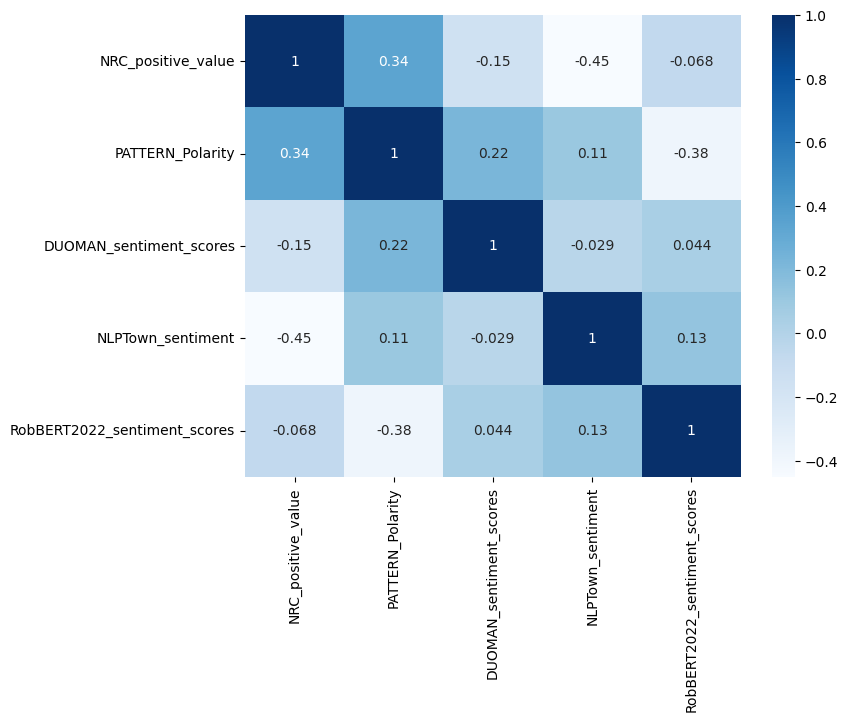

In [43]:
#Sentiment
#Correlations
#Correlation matrix
corr_matrix = sentiment.corr()
#Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
#Show matrix
plt.show()

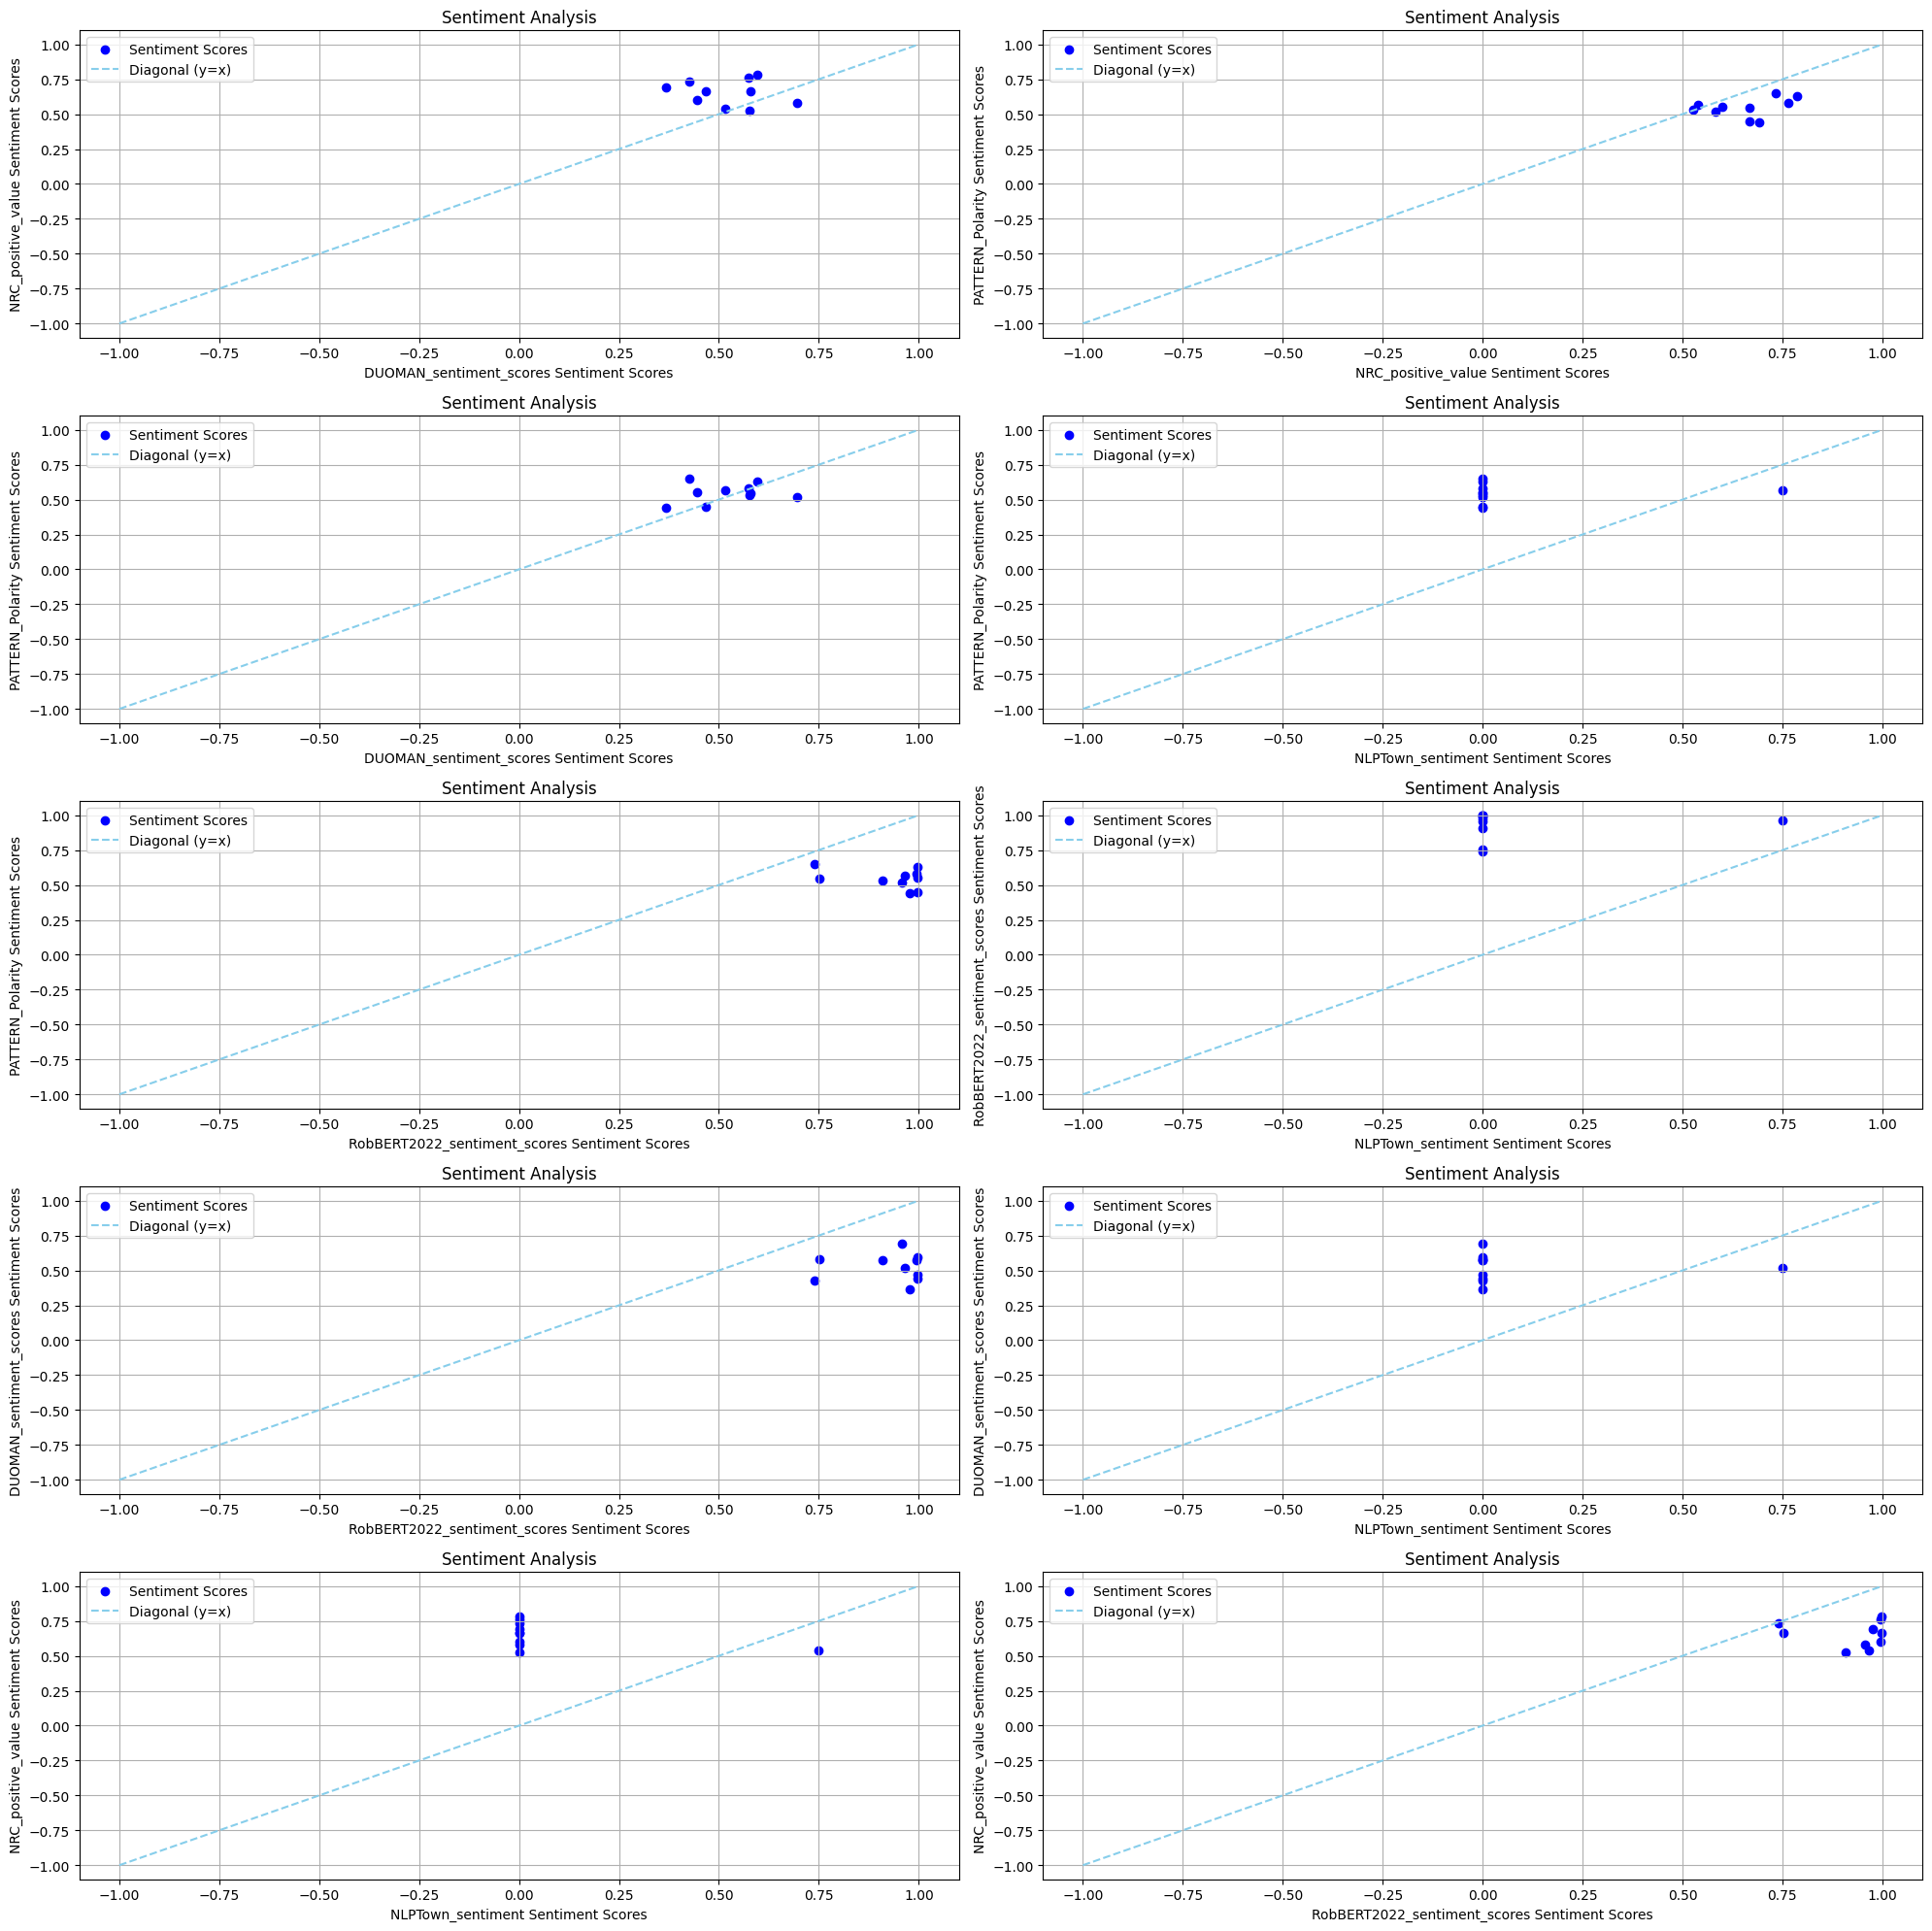

In [44]:
#Sentiment
#Visualization
#Pairs for plots
#It is desired that the dark blue dots are on the skyblue line
pairs = [('DUOMAN_sentiment_scores', 'NRC_positive_value'),
         ('NRC_positive_value', 'PATTERN_Polarity'),
         ('DUOMAN_sentiment_scores', 'PATTERN_Polarity'),
         ('NLPTown_sentiment', 'PATTERN_Polarity'),
         ('RobBERT2022_sentiment_scores', 'PATTERN_Polarity'),
         ('NLPTown_sentiment', 'RobBERT2022_sentiment_scores'),
         ('RobBERT2022_sentiment_scores', 'DUOMAN_sentiment_scores'),
         ('NLPTown_sentiment', 'DUOMAN_sentiment_scores'),
         ('NLPTown_sentiment', 'NRC_positive_value'),
         ('RobBERT2022_sentiment_scores', 'NRC_positive_value')]

#Subplots
fig, axs = plt.subplots(len(pairs)//2, 2, figsize=(20, 4*len(pairs)//2))

#Plot for each pair
for i, (x_var, y_var) in enumerate(pairs):
    row, col = divmod(i, 2)
    axs[row, col].scatter(sentiment[x_var], sentiment[y_var], color='blue', label='Sentiment Scores')
    axs[row, col].plot([-1, 1], [-1, 1], color='skyblue', linestyle='--', label='Diagonal (y=x)')
    axs[row, col].set_title('Sentiment Analysis')
    axs[row, col].set_xlabel(f'{x_var} Sentiment Scores')
    axs[row, col].set_ylabel(f'{y_var} Sentiment Scores')
    axs[row, col].legend()
    axs[row, col].grid(True)

#Show subplots
plt.tight_layout()
plt.show()


In [45]:
#Sentiment
#Mann-Whitney test
#Perform Mann-Whitney test on the pairs that were defined before
#no_difference_vars = []
for x_var, y_var in pairs:
    stat, p_value = mannwhitneyu(sentiment[x_var], sentiment[y_var])
    print(f'Mann-Whitney U test for {x_var} and {y_var}:')
    print(f'Statistic: {stat}')
    print(f'P-value: {p_value}')

    #Interpretation
    if p_value < 0.05:
        print("There is a significant difference between the results from the two methods.")
    else:
        print("No significant difference observed between the results from the two methods.")
        #no_difference_vars.append(x_var)

    print('-------------------------------------------')
#sentiment_no_difference = sentiment[no_difference_vars]

Mann-Whitney U test for DUOMAN_sentiment_scores and NRC_positive_value:
Statistic: 16.0
P-value: 0.01129895191826991
There is a significant difference between the results from the two methods.
-------------------------------------------
Mann-Whitney U test for NRC_positive_value and PATTERN_Polarity:
Statistic: 83.0
P-value: 0.013983257746930513
There is a significant difference between the results from the two methods.
-------------------------------------------
Mann-Whitney U test for DUOMAN_sentiment_scores and PATTERN_Polarity:
Statistic: 43.0
P-value: 0.6231762238821174
No significant difference observed between the results from the two methods.
-------------------------------------------
Mann-Whitney U test for NLPTown_sentiment and PATTERN_Polarity:
Statistic: 10.0
P-value: 0.00174519712887336
There is a significant difference between the results from the two methods.
-------------------------------------------
Mann-Whitney U test for RobBERT2022_sentiment_scores and PATTERN_Pol

In [46]:
#LIWC
#Correlations

#Pairs that will be compared
pairs_LIWC = [('posemo_percentage', 'Positive_percentage'),
              ('negemo_percentage', 'Negative_percentage'),
              ('sad_percentage', 'Sadness_percentage')]

#Correlations for each pair
for x_var, y_var in pairs_LIWC:
    correlation_matrix = np.corrcoef(LIWC[x_var], LIWC[y_var])
    correlation = correlation_matrix[0, 1]

    print(f'Correlation between {x_var} and {y_var}: {correlation:.2f}')


Correlation between posemo_percentage and Positive_percentage: 0.08
Correlation between negemo_percentage and Negative_percentage: 0.63
Correlation between sad_percentage and Sadness_percentage: 0.17


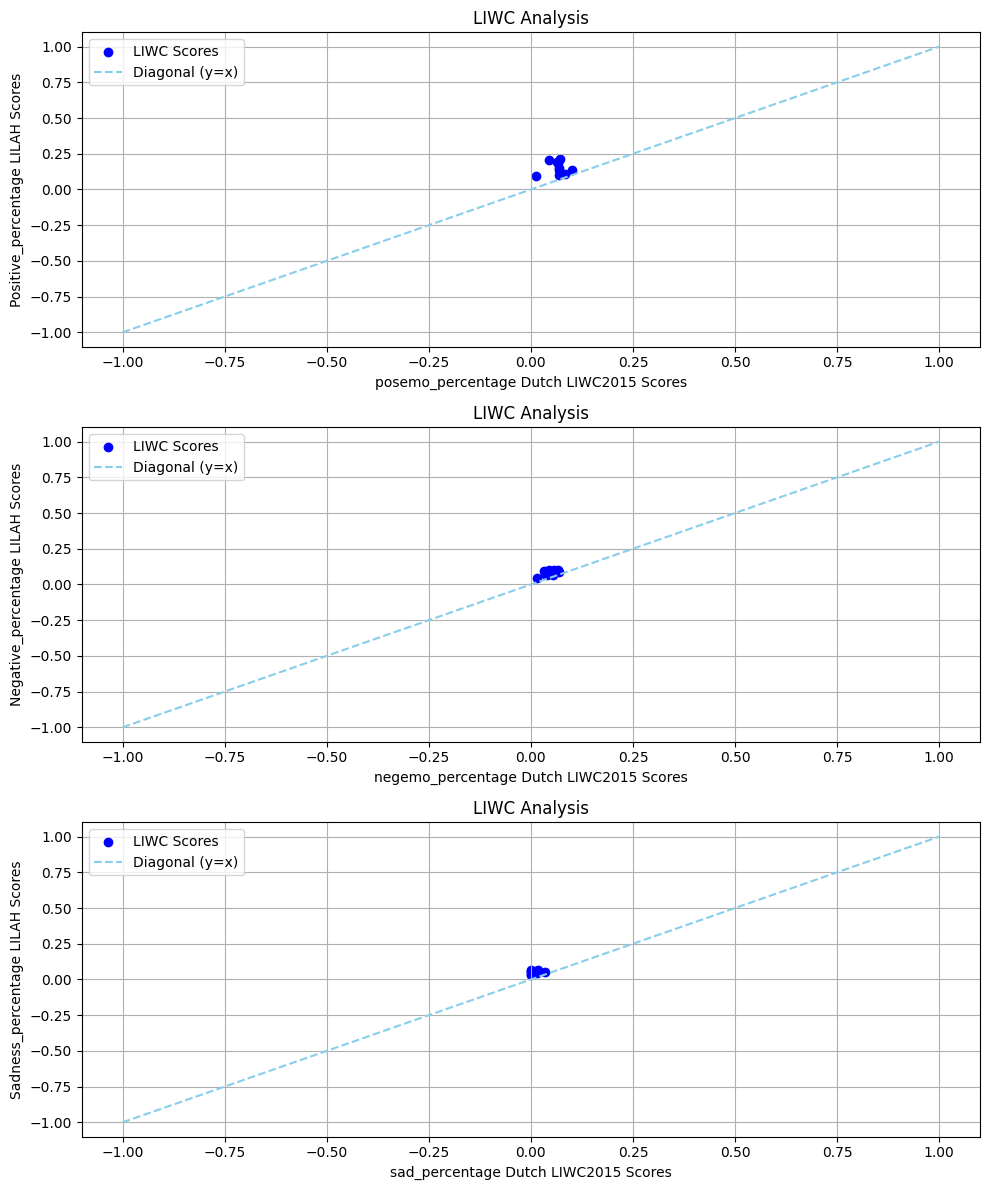

In [47]:
#LIWC
#Visualization
#Pairs were defined before
#It is desired that the dark blue dots are on the skyblue line

#Subplots
fig, axs = plt.subplots(len(pairs_LIWC), 1, figsize=(10, 4 * len(pairs_LIWC)))

#Plot for each pair
for i, (x_var, y_var) in enumerate(pairs_LIWC):
    axs[i].scatter(LIWC[x_var], LIWC[y_var], color='blue', label='LIWC Scores')
    axs[i].plot([-1, 1], [-1, 1], color='skyblue', linestyle='--', label='Diagonal (y=x)')
    axs[i].set_title('LIWC Analysis')
    axs[i].set_xlabel(f'{x_var} Dutch LIWC2015 Scores')
    axs[i].set_ylabel(f'{y_var} LILAH Scores')
    axs[i].legend()
    axs[i].grid(True)

#Show subplots
plt.tight_layout()
plt.show()


In [49]:
#LIWC
#Mann-Whitney test

#Perform Mann-Whitney U test for each pair
for x_var, y_var in pairs_LIWC:
    stat, p_value = mannwhitneyu(LIWC[x_var], LIWC[y_var])

    # Interpretation
    print(f'Mann-Whitney U test for {x_var} and {y_var}:')
    print(f'Statistic: {stat}')
    print(f'P-value: {p_value}')

    if p_value < 0.05:
        print("There is a significant difference between the distributions.")
    else:
        print("No significant difference observed between the distributions.")

    print('-------------------------------------------')


Mann-Whitney U test for posemo_percentage and Positive_percentage:
Statistic: 1.0
P-value: 0.00024612812790522973
There is a significant difference between the distributions.
-------------------------------------------
Mann-Whitney U test for negemo_percentage and Negative_percentage:
Statistic: 10.0
P-value: 0.0028065622375925453
There is a significant difference between the distributions.
-------------------------------------------
Mann-Whitney U test for sad_percentage and Sadness_percentage:
Statistic: 0.0
P-value: 0.00016304893553653748
There is a significant difference between the distributions.
-------------------------------------------


In [53]:
#Emotion
#Correlations
emotion = emotion.fillna(0)
#Pairs that will be compared
pairs_emotion = [('MEMOLON_anger', 'NRC_Anger'),
              ('MEMOLON_disgust', 'NRC_Disgust'),
              ('MEMOLON_fear', 'NRC_Fear'),
              ('MEMOLON_joy', 'NRC_Joy'),
              ('MEMOLON_anger', 'RobBERT2022_Anger'),
              ('NRC_Anger', 'RobBERT2022_Anger'),
              ('MEMOLON_fear', 'RobBERT2022_Fear'),
              ('NRC_Fear', 'RobBERT2022_Fear'),
              ('MEMOLON_joy', 'RobBERT2022_Joy'),
              ('NRC_Joy', 'RobBERT2022_Joy'),
              ('NRC_Sadness', 'RobBERT2022_Sadness'),]

#Correlations for each pair
for x_var, y_var in pairs_emotion:
    correlation_matrix = np.corrcoef(emotion[x_var], emotion[y_var])
    correlation = correlation_matrix[0, 1]

    print(f'Correlation between {x_var} and {y_var}: {correlation:.2f}')


Correlation between MEMOLON_anger and NRC_Anger: -0.36
Correlation between MEMOLON_disgust and NRC_Disgust: 0.28
Correlation between MEMOLON_fear and NRC_Fear: -0.48
Correlation between MEMOLON_joy and NRC_Joy: 0.21
Correlation between MEMOLON_anger and RobBERT2022_Anger: 0.74
Correlation between NRC_Anger and RobBERT2022_Anger: 0.12
Correlation between MEMOLON_fear and RobBERT2022_Fear: 0.35
Correlation between NRC_Fear and RobBERT2022_Fear: -0.54
Correlation between MEMOLON_joy and RobBERT2022_Joy: 0.32
Correlation between NRC_Joy and RobBERT2022_Joy: 0.39
Correlation between NRC_Sadness and RobBERT2022_Sadness: -0.15


The plots here are not represenatative between RobBERT and the other methods because RobBERT values are normalized using min-max normalization while the other methods did not.

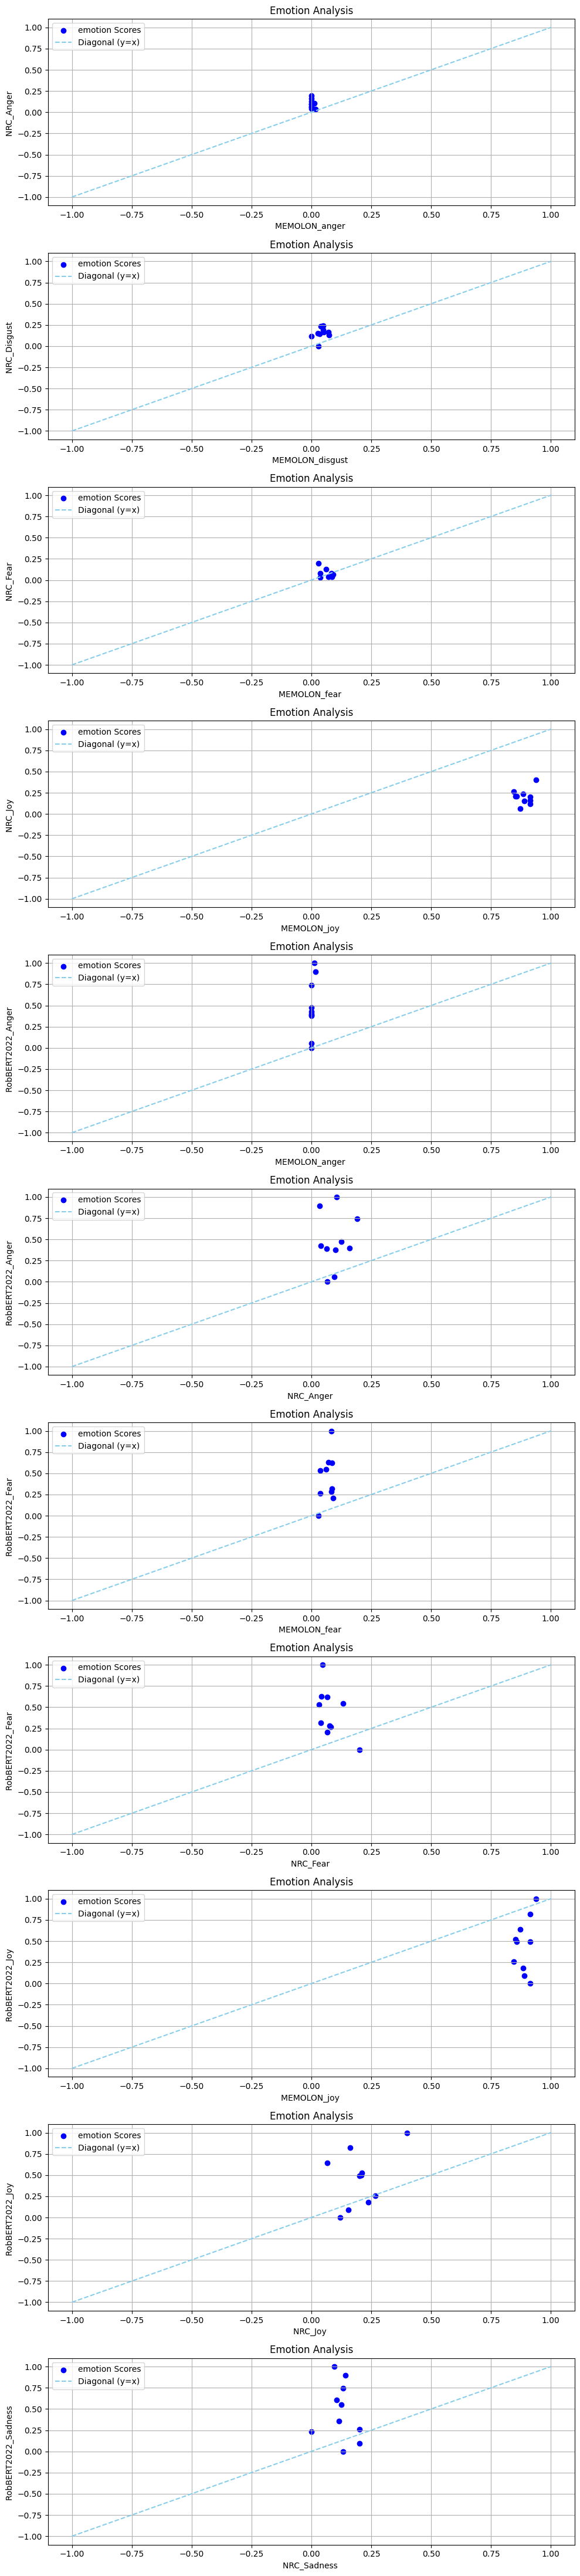

In [54]:
#Emotion
#Visualization
#Pairs were defined before
#It is desired that the dark blue dots are on the skyblue line

#Subplots
fig, axs = plt.subplots(len(pairs_emotion), 1, figsize=(10, 4 * len(pairs_emotion)))

#Plot for each pair
for i, (x_var, y_var) in enumerate(pairs_emotion):
    axs[i].scatter(emotion[x_var], emotion[y_var], color='blue', label='emotion Scores')
    axs[i].plot([-1, 1], [-1, 1], color='skyblue', linestyle='--', label='Diagonal (y=x)')
    axs[i].set_title('Emotion Analysis')
    axs[i].set_xlabel(f'{x_var} ')
    axs[i].set_ylabel(f'{y_var} ')
    axs[i].legend()
    axs[i].grid(True)

#Show subplots
plt.tight_layout()
plt.show()


In [55]:
#Emotion
#Mann-Whitney test

#Perform Mann-Whitney U test for each pair
for x_var, y_var in pairs_emotion:
    stat, p_value = mannwhitneyu(emotion[x_var], emotion[y_var])

    # Interpretation
    print(f'Mann-Whitney U test for {x_var} and {y_var}:')
    print(f'Statistic: {stat}')
    print(f'P-value: {p_value}')

    if p_value < 0.05:
        print("There is a significant difference between the distributions.")
    else:
        print("No significant difference observed between the distributions.")

    print('-------------------------------------------')

Mann-Whitney U test for MEMOLON_anger and NRC_Anger:
Statistic: 0.0
P-value: 0.00011067076459386204
There is a significant difference between the distributions.
-------------------------------------------
Mann-Whitney U test for MEMOLON_disgust and NRC_Disgust:
Statistic: 9.5
P-value: 0.0024781900556743726
There is a significant difference between the distributions.
-------------------------------------------
Mann-Whitney U test for MEMOLON_fear and NRC_Fear:
Statistic: 52.0
P-value: 0.9096203362442886
No significant difference observed between the distributions.
-------------------------------------------
Mann-Whitney U test for MEMOLON_joy and NRC_Joy:
Statistic: 100.0
P-value: 0.00018267179110955002
There is a significant difference between the distributions.
-------------------------------------------
Mann-Whitney U test for MEMOLON_anger and RobBERT2022_Anger:
Statistic: 6.0
P-value: 0.0005658154863391857
There is a significant difference between the distributions.
---------------

####Comparison

We perform one way ANOVA between avoidance learning groups and all the quantitative, sentiment and emotion features we extracted before to investigate whether the avoidance learning groups differ with each other. We compute also Spearman correlation to check the relationship between avoidance learning groups and all the features







In [56]:
#Create df with all quantitative, sentiment, emotion and LIWC features
df2 = pd.concat([quantitative, sentiment, LIWC, emotion], axis=1)
df2['avoidance_learning_groups'] = df['avoidance_learning_groups']
df2

,word_count,average_word_length,punctuation_count,adjective_count,noun_count,verb_count,NRC_positive_value,PATTERN_Polarity,DUOMAN_sentiment_scores,NLPTown_sentiment,...,NRC_Anger,NRC_Disgust,NRC_Fear,RobBERT2022_Joy,RobBERT2022_Sadness,RobBERT2022_Anger,RobBERT2022_Love,RobBERT2022_Fear,RobBERT2022_Neutral,avoidance_learning_groups
0,0.833333,0.243547,1.000000,0.777778,0.826087,0.3,0.600000,0.551615,0.444444,0.00,...,0.105263,0.131579,0.131579,0.523810,0.607938,1.000000,0.000000,0.546083,0.172779,1
1,0.866667,0.705563,0.333333,0.222222,1.000000,0.7,0.764706,0.579167,0.573529,0.00,...,0.040000,0.240000,0.080000,0.490700,0.236211,0.426870,0.293634,0.264865,0.710925,0
2,1.000000,0.416071,0.833333,0.000000,0.739130,1.0,0.666667,0.446667,0.466667,0.00,...,0.064516,0.193548,0.032258,0.820694,1.000000,0.388503,0.316323,0.530459,0.000000,2
3,0.133333,0.666976,0.000000,0.333333,0.000000,0.7,0.666667,0.547083,0.578125,0.00,...,0.095238,0.142857,0.047619,0.181993,0.896870,0.056316,1.000000,1.000000,0.154014,0
4,0.200000,0.895928,0.333333,0.000000,0.260870,0.4,0.733333,0.650926,0.425000,0.00,...,0.160000,0.120000,0.040000,0.000000,0.258445,0.400406,0.348056,0.317984,0.815672,1
5,0.000000,1.000000,0.000000,0.555556,0.434783,0.0,0.692308,0.444792,0.366667,0.00,...,0.033333,0.166667,0.066667,0.258945,0.742216,0.898766,0.202788,0.622157,0.136022,2
6,0.466667,0.000000,0.500000,0.000000,0.608696,0.5,0.785714,0.628646,0.596154,0.00,...,0.066667,0.000000,0.200000,1.000000,0.000000,0.000000,0.403941,0.000000,1.000000,0
7,0.966667,0.243547,1.000000,1.000000,0.652174,0.7,0.538462,0.567647,0.515625,0.75,...,0.125000,0.166667,0.041667,0.496229,0.550088,0.473912,0.518240,0.630168,0.323422,2
8,0.933333,0.373807,0.833333,0.888889,0.565217,0.7,0.526316,0.530729,0.576087,0.00,...,0.100000,0.233333,0.066667,0.640437,0.095815,0.377563,0.588756,0.206879,0.764462,0
9,0.500000,0.386067,0.666667,0.333333,0.347826,0.7,0.583333,0.520667,0.694444,0.00,...,0.192308,0.153846,0.076923,0.092398,0.358463,0.742459,0.210201,0.281681,0.623446,0


In [57]:
#One way ANOVA

#Include all the features to be compared with avoidance learning groups
features = df2.columns.difference(['avoidance_learning_groups'])

for feature in features:
    #ANOVA
    anova_result = f_oneway(*(df2[feature][df2['avoidance_learning_groups'] == group] for group in df2['avoidance_learning_groups'].unique()))
    #Print results
    print(f"ANOVA for {feature}: F-statistic={anova_result.statistic:.2f}, p-value={anova_result.pvalue:.4f}")

    #Check if difference is significant
    significance_level = 0.05
    if anova_result.pvalue < significance_level:
        print("The avoidance learning groups are significantly different in terms of {}.".format(feature))
    else:
        print("The avoidance learning groups are not significantly different in terms of {}.".format(feature))
    print("----------------------------------------------------------------------------------------------------")

ANOVA for Anger_percentage: F-statistic=0.70, p-value=0.5305
The avoidance learning groups are not significantly different in terms of Anger_percentage.
----------------------------------------------------------------------------------------------------
ANOVA for DUOMAN_sentiment_scores: F-statistic=10.07, p-value=0.0087
The avoidance learning groups are significantly different in terms of DUOMAN_sentiment_scores.
----------------------------------------------------------------------------------------------------
ANOVA for MEMOLON_anger: F-statistic=1.12, p-value=0.3786
The avoidance learning groups are not significantly different in terms of MEMOLON_anger.
----------------------------------------------------------------------------------------------------
ANOVA for MEMOLON_disgust: F-statistic=0.98, p-value=0.4218
The avoidance learning groups are not significantly different in terms of MEMOLON_disgust.
----------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [58]:
#Spearman

for feature in features:
    #Spearman correlation
    correlation, p_value = spearmanr(df2[feature], df2['avoidance_learning_groups'])

    #Print result and significance
    if p_value < significance_level:
        print(f"Spearman correlation between avoidance_learning_groups and {feature} is significant: correlation={correlation:.2f}, p-value={p_value:.4f}")
    else:
        print(f"Spearman correlation between avoidance_learning_groups and {feature} is not significant: correlation={correlation:.2f}, p-value={p_value:.4f}")
    print("----------------------------------------------------------------------------------------------------")

Spearman correlation between avoidance_learning_groups and Anger_percentage is not significant: correlation=-0.03, p-value=0.9425
----------------------------------------------------------------------------------------------------
Spearman correlation between avoidance_learning_groups and DUOMAN_sentiment_scores is significant: correlation=-0.79, p-value=0.0066
----------------------------------------------------------------------------------------------------
Spearman correlation between avoidance_learning_groups and MEMOLON_anger is not significant: correlation=0.45, p-value=0.1963
----------------------------------------------------------------------------------------------------
Spearman correlation between avoidance_learning_groups and MEMOLON_disgust is not significant: correlation=0.51, p-value=0.1293
----------------------------------------------------------------------------------------------------
Spearman correlation between avoidance_learning_groups and MEMOLON_fear is not 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


###Prediction of avoidance learning

In [59]:
#All the features to predict avoidance learning groups
X_all_features = df2.drop(columns=['avoidance_learning_groups'])

#Predicted variable
y = df2['avoidance_learning_groups']

#Train/val/test sets
random.seed(55)
X_train, X_test, y_train, y_test = train_test_split(X_all_features, y, test_size=0.2, random_state=55)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=55)

#####Multiclass Logistic Regression

In [60]:
#Train the Logistic Regression model
log = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
log.fit(X_train, y_train)

#Evaluate performance
y_log_pred = log.predict(X_test)
print("Multiclass Logistic Regression")
print(classification_report(y_test, y_log_pred, labels=('low', 'medium', 'high')))
accuracy = accuracy_score(y_test, y_log_pred)
print(f'Accuracy: {accuracy:.2f}')

Multiclass Logistic Regression
              precision    recall  f1-score   support

         low       0.00      0.00      0.00       0.0
      medium       0.00      0.00      0.00       0.0
        high       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       0.0
   macro avg       0.00      0.00      0.00       0.0
weighted avg       0.00      0.00      0.00       0.0

Accuracy: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344:

#####SVM

In [61]:
#Train linear SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

#Predictions on test set
y_pred = svm_model.predict(X_test)

#Evaluate performance
print(classification_report(y_test, y_pred, labels=('low', 'medium', 'high')))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

         low       0.00      0.00      0.00       0.0
      medium       0.00      0.00      0.00       0.0
        high       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       0.0
   macro avg       0.00      0.00      0.00       0.0
weighted avg       0.00      0.00      0.00       0.0

Accuracy: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: